# Project 2: Predicting Housing Prices with Linear Regression

### The Problem Statement

Have you ever looked at a nice house and said, “I wonder how much that’s worth?”
Perhaps you’ve fretted about the value of your own property, or got into a heated argument with a relative/potential buyer on the perceived price of your property.
What if there was a simple and effective solution to all of this?
Here’s what us data scientists at MetaQuark Realty aim to achieve - a simple solution so that you, the home buyer/owner to accurately predict the price of a property. 

There are are many variables that determine how much a home can fetch.
Using the Ames (IA) dataset (train, test), we want to find out which variables matters for home sale prices and produce accurate sale price predictions. 
This model will help provide the Outside View*, helping to reduce information asymmetry between potential home-buyers, home-sellers and real estate agents.

As the objective of the problem statement is to find a model with input features which is most predictive in estimating the sale price, I will be leveraging on linear regression, ridge and lasso respectively.  The model evaluation metrics will be based on R2 and root mean square error (RMSE) and also leveraging on a baseline model to assess the performance of the model.  Lastly, we want the model to be interpretable.  In short, the features that are most predictive or "moves the needle" on sale price must make economic sense.  There is no point having a model with best performance against the metrics mentioned but uses features which doesn't make sense.

**Problem Statement Rubic** - they are highlighted green to remind myself I have cover them to my best knowledge..

- <span style="background-color: #0dff00">Is it clear what the student plans to do?</span>
- <span style="background-color: #0dff00">What type of model will be developed?</span>
- <span style="background-color: #0dff00">How will success be evaluated?</span>
- <span style="background-color: #0dff00">Is the scope of the project appropriate?</span>
- <span style="background-color: #0dff00">Is it clear who cares about this or why this is important to investigate?</span>
- <span style="background-color: #0dff00">Does the student consider the audience and the primary and secondary stakeholders?</span>

### EDA and Data Cleaning

**Data Cleaning and EDA Rubic** - they are highlighted green to remind myself I have done them at least to my best knowledge..

- <span style="background-color: #0dff00">Are missing values imputed appropriately?</span>
- <span style="background-color: #0dff00">Are distributions examined and described?</span>
- <span style="background-color: #0dff00">Are outliers identified and addressed?</span>
- <span style="background-color: #0dff00">Are appropriate summary statistics provided?</span>
- <span style="background-color: #0dff00">Are steps taken during data cleaning and EDA framed appropriately?</span>
- <span style="background-color: #0dff00">Does the student address whether or not they are likely to be able to answer their problem statement with the provided data given what they've discovered during EDA?</span>

In [365]:
#import relevant classes
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder

In [366]:
sns.set()
house_train = pd.read_csv('./datasets/train.csv')
house_test = pd.read_csv('./datasets/test.csv')
house_train.head()

Id        PID  MSSubClass MSZoning  LotFrontage  LotArea Street Alley  \
0  109  533352170          60       RL          NaN    13517   Pave   NaN   
1  544  531379050          60       RL         43.0    11492   Pave   NaN   
2  153  535304180          20       RL         68.0     7922   Pave   NaN   
3  318  916386060          60       RL         73.0     9802   Pave   NaN   
4  255  906425045          50       RL         82.0    14235   Pave   NaN   

  LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0      IR1         Lvl    AllPub   CulDSac       Gtl       Sawyer       RRAe   
1      IR1         Lvl    AllPub   CulDSac       Gtl      SawyerW       Norm   
2      Reg         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
3      Reg         Lvl    AllPub    Inside       Gtl       Timber       Norm   
4      IR1         Lvl    AllPub    Inside       Gtl      SawyerW       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            6            8       1976   
1       Norm     1Fam     2Story            7            5       1996   
2       Norm     1Fam     1Story            5            7       1953   
3       Norm     1Fam     2Story            5            5       2006   
4       Norm     1Fam     1.5Fin            6            8       1900   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2005     Gable  CompShg     HdBoard     Plywood    BrkFace   
1          1997     Gable  CompShg     VinylSd     VinylSd    BrkFace   
2          2007     Gable  CompShg     VinylSd     VinylSd       None   
3          2007     Gable  CompShg     VinylSd     VinylSd       None   
4          1993     Gable  CompShg     Wd Sdng     Plywood       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       289.0        Gd        TA     CBlock       TA       TA           No   
1       132.0        Gd        TA      PConc       Gd       TA           No   
2         0.0        TA        Gd     CBlock       TA       TA           No   
3         0.0        TA        TA      PConc       Gd       TA           No   
4         0.0        TA        TA      PConc       Fa       Gd           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ       533.0          Unf         0.0      192.0        725.0   
1          GLQ       637.0          Unf         0.0      276.0        913.0   
2          GLQ       731.0          Unf         0.0      326.0       1057.0   
3          Unf         0.0          Unf         0.0      384.0        384.0   
4          Unf         0.0          Unf         0.0      676.0        676.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       725       754             0   
1    GasA        Ex          Y      SBrkr       913      1209             0   
2    GasA        TA          Y      SBrkr      1057         0             0   
3    GasA        Gd          Y      SBrkr       744       700             0   
4    GasA        TA          Y      SBrkr       831       614             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1479           0.0           0.0         2         1             3   
1       2122           1.0           0.0         2         1             4   
2       1057           1.0           0.0         1         0             3   
3       1444           0.0           0.0         2         1             3   
4       1445           0.0           0.0         2         0             3   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             6        Typ           0         NaN   
1             1          Gd             8        Typ           1          TA   
2             1          Gd             5       

In [367]:
house_train.shape

(2051, 81)

## Data Cleaning

#### Checking & Fixing Missing Value
Before performing any EDA, I would like get an overview of the dataset (and their imported data type) to do a sanity check on the data quality of the dataset.  

In [368]:
house_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2051 non-null   int64  
 1   PID            2051 non-null   int64  
 2   MSSubClass     2051 non-null   int64  
 3   MSZoning       2051 non-null   object 
 4   LotFrontage    1721 non-null   float64
 5   LotArea        2051 non-null   int64  
 6   Street         2051 non-null   object 
 7   Alley          140 non-null    object 
 8   LotShape       2051 non-null   object 
 9   LandContour    2051 non-null   object 
 10  Utilities      2051 non-null   object 
 11  LotConfig      2051 non-null   object 
 12  LandSlope      2051 non-null   object 
 13  Neighborhood   2051 non-null   object 
 14  Condition1     2051 non-null   object 
 15  Condition2     2051 non-null   object 
 16  BldgType       2051 non-null   object 
 17  HouseStyle     2051 non-null   object 
 18  OverallQ

**Observation:** Some of the columns seems to have serious missing values situation and based on the number of imported "object" datatype, there are some work to be done here to potentially convert them to numerical for model development subsequently.  Let move on to further investigation next.  Next, I have performed a summary of NA values for the individual columns imported to get a initial view.

In [369]:
# getting %nulls for cols with missing values
missing_df = pd.DataFrame(house_train.isna().sum()).reset_index()
missing_df.columns = ['col', 'num_nulls'] # updating all col names in missing_df
missing_df['%nulls'] = missing_df['num_nulls']*100/len(house_train) #creating a new col for %nulls (num_nulls/df_len)
missing_df[missing_df['num_nulls']>0].sort_values(by=['%nulls'], ascending=False)

col  num_nulls     %nulls
73        PoolQC       2042  99.561190
75   MiscFeature       1986  96.830814
7          Alley       1911  93.174061
74         Fence       1651  80.497318
58   FireplaceQu       1000  48.756704
4    LotFrontage        330  16.089712
60   GarageYrBlt        114   5.558264
65    GarageCond        114   5.558264
64    GarageQual        114   5.558264
61  GarageFinish        114   5.558264
59    GarageType        113   5.509508
33  BsmtExposure         58   2.827889
36  BsmtFinType2         56   2.730375
32      BsmtCond         55   2.681619
31      BsmtQual         55   2.681619
34  BsmtFinType1         55   2.681619
27    MasVnrArea         22   1.072647
26    MasVnrType         22   1.072647
49  BsmtHalfBath          2   0.097513
48  BsmtFullBath          2   0.097513
39   TotalBsmtSF          1   0.048757
38     BsmtUnfSF          1   0.048757
37    BsmtFinSF2          1   0.048757
62    GarageCars          1   0.048757
63    GarageArea          1   0.048757
35    BsmtFinSF1          1   0.048757

**Observation**: This confirms that some columns like PoolQC, MiscFeature, Alley, Fence and FireplaceQu suffer quite serious missing value (at initial glance here before looking at the data dictionary..).  After taking a serious look into the data dictionary, most of these columns are categorical feature and the missing value or NAN indicates no availability of the specific category.  Please see below for further explanation and action taken.

**Data Handling Explanation:**

1. PoolQC - this column (pool quality) is 99.56% null and looking at the data dictionary, null or NA means no pool and not necessarily missing data.  I have decided to drop those columns that has more than 80% null since the information value isn't significant.
2. FireplaceQu - referring to the data dictionary, having null doesn't mean missing value it seems.  It is just mean no fireplace.
        FireplaceQu (Ordinal): Fireplace quality
            Ex	Excellent - Exceptional Masonry Fireplace
            Gd	Good - Masonry Fireplace in main level
            TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
            Fa	Fair - Prefabricated Fireplace in basement
            Po	Poor - Ben Franklin Stove
            NA	No Fireplace
3. MiscFeature - likewise, referring to the data dictionary, having null mean not having other miscellaneous features
        Misc Feature (Nominal): Miscellaneous feature not covered in other categories
           Elev	Elevator
           Gar2	2nd Garage (if not described in garage section)
           Othr	Other
           Shed	Shed (over 100 SF)
           TenC	Tennis Court
           NA	None
4. Alley - similar case for Alley
        Alley (Nominal): Type of alley access to property
            Grvl	Gravel
            Pave	Paved
            NA 	No alley access
5. To be consistent in handling categorical column, I have decided to insert 'Others' for categorical column with NaN value initially (later I will be converting them to numerical accordingly)

In [370]:
house_train.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'PID'], axis=1, inplace=True)
house_test.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'PID'], axis=1, inplace=True)

**Note:**For column 'PoolQC', 'Alley', 'Fence', 'MiscFeature', since the information value (or sometime refer to variability) are significant, I have decided to drop them to simplify the features potentially used for the model.  Also, for PID, it seems to be a running number similar to Id, decided to drop it as well.

In [371]:
house_train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  2051.000000  2051.000000  1721.000000    2051.000000  2051.000000   
mean   1474.033642    57.008776    69.055200   10065.208191     6.112140   
std     843.980841    42.824223    23.260653    6742.488909     1.426271   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     753.500000    20.000000    58.000000    7500.000000     5.000000   
50%    1486.000000    50.000000    68.000000    9430.000000     6.000000   
75%    2198.000000    70.000000    80.000000   11513.500000     7.000000   
max    2930.000000   190.000000   313.000000  159000.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  2051.000000  2051.000000   2051.000000  2029.000000  2050.000000   
mean      5.562165  1971.708922   1984.190151    99.695909   442.300488   
std       1.104497    30.177889     21.036250   174.963129   461.204124   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1953.500000   1964.500000     0.000000     0.000000   
50%       5.000000  1974.000000   1993.000000     0.000000   368.000000   
75%       6.000000  2001.000000   2004.000000   161.000000   733.750000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  2050.000000  2050.000000  2050.000000  2051.000000  2051.000000   
mean     47.959024   567.728293  1057.987805  1164.488055   329.329108   
std     165.000901   444.954786   449.410704   396.446923   425.671046   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   220.000000   793.000000   879.500000     0.000000   
50%       0.000000   474.500000   994.500000  1093.000000     0.000000   
75%       0.000000   811.000000  1318.750000  1405.000000   692.500000   
max    1474.000000  2336.000000  6110.000000  5095.000000  1862.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   2051.000000  2051.000000   2049.000000   2049.000000  2051.000000   
mean       5.512921  1499.330083      0.427526      0.063446     1.577279   
std       51.068870   500.447829      0.522673      0.251705     0.549279   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.000000      0.000000      0.000000     1.000000   
50%        0.000000  1444.000000      0.000000      0.000000     2.000000   
75%        0.000000  1728.500000      1.000000      0.000000     2.000000   
max     1064.000000  5642.000000      3.000000      2.000000     4.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  2051.000000   2051.000000   2051.000000   2051.000000  2051.000000   
mean      0.371039      2.843491      1.042906      6.435885     0.590931   
std       0.501043      0.826618      0.209790      1.560225     0.638516   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     15.000000     4.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1937.000000  2050.000000  2050.000000  2051.000000  2051.000000   
mean   1978.707796     1.776585   473.671707    93.833740    47.556802   
std      25.441094     0.764537   215.934561   128.549416    66.747241   
min    1895.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   319.000000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    27.000000   
75%    2002.000000     2.000000   576.000000   168.000000    70.000000   
max    2

**Note:** Looking briefly thru the statistics above, I can see column like 'GrLivArea', 'LotArea' and others seems to have outlier (looking at both the mean with std, some of these max are quite big).  Look further with some scatterplots later.  Let resolve the missing value for the rest first.

In [372]:
#need to align below codes
house_train['FireplaceQu'].fillna('Others', inplace=True)

This is to ensure there is not contradiction while imputing 'FireplaceQu' NAN with 'Others' to indicate no fireplace.

In [373]:
#this is to confirm if the data produce any contradiction, searching
#if there is a case whereby 'FireplaceQu' indicates no fireplace and 'Firecplaces' indicating existance of fire place
house_train.groupby('FireplaceQu')['Fireplaces'].mean()

FireplaceQu
Ex        1.064516
Fa        1.186441
Gd        1.149140
Others    0.000000
Po        1.000000
TA        1.171990
Name: Fireplaces, dtype: float64

**Note:** Next is to investigate further on Garage related column

In [374]:
house_train['GarageYrBlt'].unique()

array([1976., 1997., 1953., 2007., 1957., 1966., 2005., 1959., 1952.,
       1969., 1971., 1900., 2000., 2004., 1916., 1963., 1977., 2009.,
       1968., 1992., 1955., 1961., 1973., 1937.,   nan, 2003., 1981.,
       1931., 1995., 1958., 1965., 2006., 1978., 1954., 1935., 1951.,
       1996., 1999., 1920., 1930., 1924., 1960., 1949., 1986., 1956.,
       1994., 1979., 1964., 2001., 1972., 1939., 1962., 1927., 1948.,
       1967., 1993., 2010., 1915., 1987., 1970., 1988., 1982., 1941.,
       1984., 1942., 1950., 2002., 1975., 2008., 1974., 1998., 1918.,
       1938., 1985., 1923., 1980., 1991., 1946., 1940., 1990., 1896.,
       1983., 1914., 1945., 1921., 1925., 1926., 1936., 1932., 1947.,
       1929., 1910., 1917., 1922., 1934., 1989., 1928., 2207., 1933.,
       1895., 1919.])

In [375]:
pd.set_option('max_columns', None)
nan_rows = house_train[house_train['GarageYrBlt'].isnull() & house_train['GarageType'].notnull()]
nan_rows

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
1712  2237          70       RM         50.0     9060   Pave      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1712         Lvl    AllPub    Inside       Gtl       IDOTRR       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1712       Norm     1Fam     2Story            5            6       1923   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1712          1999     Gable  CompShg     Wd Sdng     Plywood       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1712         0.0        TA        TA     BrkTil       Gd       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1712           No          ALQ       548.0          Unf         0.0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
1712      311.0        859.0    GasA        Ex          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1712       942       886             0       1828           0.0           0.0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
1712         2         0             3             1          Gd   

      TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt  \
1712             6        Typ           0      Others     Detchd          NaN   

     GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  \
1712          NaN         NaN         NaN        NaN        NaN          Y   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
1712         174            0            212          0            0   

      PoolArea  MiscVal  MoSold  YrSold SaleType  SalePrice  
1712         0        0       3    2007      WD      150909

**Note:** 'Garage' related column should be consistent.  We can't have one of the related column indicated as "no garage" and having other column indicating otherwise.  This row clearly has an issue.  Shall populate 'GarageType' firstly to NaN and then later to 'Others' to stay consistent with other Garage related column.

In [376]:
house_train.loc[1712, 'GarageType'] = np.nan

In [377]:
house_train[house_train['GarageYrBlt'].isnull() & house_train['GarageType'].notnull()]

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, SaleType, SalePrice]
Index: []

In [378]:
#need to align below Garage related column
house_train['GarageType'].fillna('Others', inplace=True)
#since GarageYrBlt is numeric, we put it to '0'
house_train['GarageYrBlt'].fillna(0, inplace=True)
house_train['GarageFinish'].fillna('Others', inplace=True)
house_train['GarageCars'].fillna(0, inplace=True)
house_train['GarageArea'].fillna(0, inplace=True)
house_train['GarageQual'].fillna('Others', inplace=True)
house_train['GarageCond'].fillna('Others', inplace=True)

**Note:** Next is to investigate further on Basement related columns, BsmtExposure, BsmtFinType2, BsmtCond, BsmtQual, BsmtFinType1, BsmtHalfBath, BsmtFullBath, TotalBsmtSF, BsmtUnfSF, BsmtFinSF2, BsmtFinSF1

In [379]:
house_train[house_train['BsmtCond'].notnull() & house_train['BsmtQual'].notnull() & house_train['BsmtFinType1'].notnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
0      109          60       RL          NaN    13517   Pave      IR1   
1      544          60       RL         43.0    11492   Pave      IR1   
2      153          20       RL         68.0     7922   Pave      Reg   
3      318          60       RL         73.0     9802   Pave      Reg   
4      255          50       RL         82.0    14235   Pave      IR1   
...    ...         ...      ...          ...      ...    ...      ...   
2046  1587          20       RL         79.0    11449   Pave      IR1   
2047   785          30       RL          NaN    12342   Pave      IR1   
2048   916          50       RL         57.0     7558   Pave      Reg   
2049   639          20       RL         80.0    10400   Pave      Reg   
2050    10          60       RL         60.0     7500   Pave      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub   CulDSac       Gtl       Sawyer       RRAe   
1            Lvl    AllPub   CulDSac       Gtl      SawyerW       Norm   
2            Lvl    AllPub    Inside       Gtl        NAmes       Norm   
3            Lvl    AllPub    Inside       Gtl       Timber       Norm   
4            Lvl    AllPub    Inside       Gtl      SawyerW       Norm   
...          ...       ...       ...       ...          ...        ...   
2046         HLS    AllPub    Inside       Gtl       Timber       Norm   
2047         Lvl    AllPub    Inside       Gtl      Edwards       Norm   
2048         Bnk    AllPub    Inside       Gtl      Crawfor       Norm   
2049         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2050         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm     1Fam     2Story            6            8       1976   
1          Norm     1Fam     2Story            7            5       1996   
2          Norm     1Fam     1Story            5            7       1953   
3          Norm     1Fam     2Story            5            5       2006   
4          Norm     1Fam     1.5Fin            6            8       1900   
...         ...      ...        ...          ...          ...        ...   
2046       Norm     1Fam     1Story            8            5       2007   
2047       Norm     1Fam     1Story            4            5       1940   
2048       Norm     1Fam     1.5Fin            6            6       1928   
2049       Norm     1Fam     1Story            4            5       1956   
2050       Norm     1Fam     2Story            7            5       1999   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             2005     Gable  CompShg     HdBoard     Plywood    BrkFace   
1             1997     Gable  CompShg     VinylSd     VinylSd    BrkFace   
2             2007     Gable  CompShg     VinylSd     VinylSd       None   
3             2007     Gable  CompShg     VinylSd     VinylSd       None   
4             1993     Gable  CompShg     Wd Sdng     Plywood       None   
...            ...       ...      ...         ...         ...        ...   
2046          2007     Gable  CompShg     VinylSd     VinylSd       None   
2047          1950     Gable  CompShg     VinylSd     VinylSd       None   
2048          1950     Gable  CompShg     BrkFace       Stone       None   
2049          1956     Gable  CompShg     Plywood     Plywood       None   
2050          1999     Gable  CompShg     VinylSd     VinylSd       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0          289.0        Gd        TA     CBlock       TA       TA   
1          132.0        Gd        TA      PConc       Gd       TA   
2            0.0        TA        Gd     CBlock       TA       TA   
3            0.0        TA        TA      PConc       Gd       TA   
4            0.0        TA        TA      PConc       Fa       Gd   
..

In [380]:
house_train[house_train['BsmtFinType2'].isnull() & house_train['BsmtCond'].notnull() & house_train['BsmtQual'].notnull() & house_train['BsmtFinType1'].notnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
1147  445          20       RL         85.0    10655   Pave      IR1   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1147         Lvl    AllPub    Inside       Gtl      NridgHt       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1147       Norm     1Fam     1Story            8            5       2003   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1147          2004     Gable  CompShg     VinylSd     VinylSd    BrkFace   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1147       296.0        Gd        TA      PConc       Gd       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1147           No          GLQ      1124.0          NaN       479.0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
1147     1603.0       3206.0    GasA        Ex          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1147      1629         0             0       1629           1.0           0.0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
1147         2         0             3             1          Gd   

      TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt  \
1147             7        Typ           1          Gd     Attchd       2003.0   

     GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  \
1147          RFn         3.0       880.0         TA         TA          Y   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
1147           0            0              0          0            0   

      PoolArea  MiscVal  MoSold  YrSold SaleType  SalePrice  
1147         0        0      10    2009      WD      284000

**Note:** Suggest to remove this row as column 'BsmtFinType2' should either align with the rest of the column to indicate "no basement" or there should be a value in it.  In this case, I couldn't derive a logical value to it from the logic seen in the sample above.

In [381]:
house_train.drop(1147, inplace=True)

In [382]:
missing_df = pd.DataFrame(house_train.isna().sum()).reset_index()
missing_df.columns = ['col', 'num_nulls'] # updating all col names in missing_df
missing_df['%nulls'] = missing_df['num_nulls']*100/len(house_train) #creating a new col for %nulls (num_nulls/df_len)
missing_df[missing_df['num_nulls']>0].sort_values(by=['%nulls'], ascending=False)

col  num_nulls     %nulls
3    LotFrontage        330  16.097561
31  BsmtExposure         58   2.829268
29      BsmtQual         55   2.682927
30      BsmtCond         55   2.682927
32  BsmtFinType1         55   2.682927
34  BsmtFinType2         55   2.682927
24    MasVnrType         22   1.073171
25    MasVnrArea         22   1.073171
46  BsmtFullBath          2   0.097561
47  BsmtHalfBath          2   0.097561
33    BsmtFinSF1          1   0.048780
35    BsmtFinSF2          1   0.048780
36     BsmtUnfSF          1   0.048780
37   TotalBsmtSF          1   0.048780

In [383]:
house_train[house_train['BsmtExposure'].isnull() & house_train['BsmtCond'].notnull() & house_train['BsmtQual'].notnull() & house_train['BsmtFinType1'].notnull() & house_train['BsmtFinType2'].notnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
1456  1797          60       FV         81.0    10411   Pave      Reg   
1547    67          20       RL         73.0     8987   Pave      Reg   
1997  2780          60       RL         65.0    14006   Pave      IR1   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1456         Lvl    AllPub    Corner       Gtl      Somerst       Norm   
1547         Lvl    AllPub    Inside       Gtl      Somerst       Norm   
1997         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1456       Norm     1Fam     2Story            5            5       2007   
1547       Norm     1Fam     1Story            8            5       2005   
1997       Norm     1Fam     2Story            7            5       2002   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1456          2007     Gable  CompShg     VinylSd     VinylSd       None   
1547          2006     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1997          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1456         0.0        Gd        TA     CBlock       Gd       TA   
1547       226.0        Gd        TA      PConc       Gd       TA   
1997       144.0        Gd        TA      PConc       Gd       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1456          NaN          Unf         0.0          Unf         0.0   
1547          NaN          Unf         0.0          Unf         0.0   
1997          NaN          Unf         0.0          Unf         0.0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
1456      725.0        725.0    GasA        Ex          Y      SBrkr   
1547     1595.0       1595.0    GasA        Ex          Y      SBrkr   
1997      936.0        936.0    GasA        Ex          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1456       725       863             0       1588           0.0           0.0   
1547      1595         0             0       1595           0.0           0.0   
1997       936       840             0       1776           0.0           0.0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
1456         3         0             3             1          Gd   
1547         2         0             2             1          Gd   
1997         2         1             3             1          Gd   

      TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt  \
1456             8        Typ           0      Others     Attchd       2007.0   
1547             6        Typ           1          Gd     Attchd       2005.0   
1997             7        Typ           1          TA     Attchd       2002.0   

     GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  \
1456          Unf         2.0       561.0         TA         TA          Y   
1547          RFn         3.0       880.0         TA         TA          Y   
1997          RFn         2.0       474.0         TA         TA          Y   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
1456           0            0              0          0            0   
1547         144            0              0          0            0   
1997         144           96              0          0            0   

      PoolArea  MiscVal  MoSold  YrSold SaleType  SalePrice  
1456         0        0       7    2007      New     212109  
1547         0        0       5    2010      WD      221500  
1997         0        0       2    2006      WD      192500

In [384]:
house_train.drop(1456, inplace=True)
house_train.drop(1547, inplace=True)
house_train.drop(1997, inplace=True)

In [385]:
missing_df = pd.DataFrame(house_train.isna().sum()).reset_index()
missing_df.columns = ['col', 'num_nulls'] # updating all col names in missing_df
missing_df['%nulls'] = missing_df['num_nulls']*100/len(house_train) #creating a new col for %nulls (num_nulls/df_len)
missing_df[missing_df['num_nulls']>0].sort_values(by=['%nulls'], ascending=False)

col  num_nulls     %nulls
3    LotFrontage        330  16.121153
29      BsmtQual         55   2.686859
30      BsmtCond         55   2.686859
31  BsmtExposure         55   2.686859
32  BsmtFinType1         55   2.686859
34  BsmtFinType2         55   2.686859
24    MasVnrType         22   1.074744
25    MasVnrArea         22   1.074744
46  BsmtFullBath          2   0.097704
47  BsmtHalfBath          2   0.097704
33    BsmtFinSF1          1   0.048852
35    BsmtFinSF2          1   0.048852
36     BsmtUnfSF          1   0.048852
37   TotalBsmtSF          1   0.048852

In [386]:
house_train[house_train['BsmtQual'].isnull() & house_train['BsmtCond'].isnull() & house_train['BsmtExposure'].isnull() & house_train['BsmtFinType1'].isnull() & house_train['BsmtFinType2'].isnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
12     807          70       RL        120.0    26400   Pave      Reg   
93     811          90       RL         64.0     7018   Pave      Reg   
114    781          20       RL          NaN     9000   Pave      Reg   
146    888          85       RL         64.0     7301   Pave      Reg   
183   1554          20  A (agr)         80.0    14584   Pave      Reg   
240   2740          20       RL         80.0    12048   Pave      Reg   
249   2242          50       RM         64.0    11067   Pave      Reg   
256   2745          20       RL         77.0     8335   Pave      Reg   
390     84          90       RM         68.0     8930   Pave      Reg   
437   1501          90       RL         65.0     6040   Pave      Reg   
485    155          20       RL         60.0     7200   Pave      Reg   
499    812          90       RL         64.0     7018   Pave      Reg   
514   2082          30       RL          NaN    11515   Pave      IR1   
580   1504          90       RL         74.0     6845   Pave      Reg   
581    946          30  I (all)        109.0    21780   Grvl      Reg   
616   1498          20       RL        123.0    47007   Pave      IR1   
635   2904          20  A (agr)        125.0    31250   Pave      Reg   
642    953          90       RL         75.0    10125   Pave      Reg   
696    274          30       RL         67.0     8777   Pave      Reg   
700    207         190       RM         70.0     5600   Pave      Reg   
737    788          20       RL          NaN    15635   Pave      IR1   
772    679          90       RL         60.0     7200   Pave      Reg   
790   1205          20       RL         74.0     7785   Pave      IR1   
794   1255          20       RL         60.0    10122   Pave      Reg   
924    677          90       RL         60.0     8544   Pave      Reg   
933   1375          50       RL         80.0    17120   Pave      Reg   
954   2622          20       RL         60.0     7200   Pave      Reg   
1007  1880          90       RL          NaN    10899   Pave      IR1   
1022  2703          30       RL         55.0     8250   Pave      Reg   
1049  2177          90       RL          NaN     9555   Pave      IR1   
1089   709          30       RM         50.0     5925   Pave      Reg   
1098  1260         190       RL         60.0    10800   Pave      Reg   
1125  2626          90       RL          NaN     8544   Pave      Reg   
1157   897          50       RL         50.0     8405   Pave      Reg   
1211  2893         120       RM          NaN     8239   Pave      IR1   
1222  1326          20       RM         70.0    12702   Pave      Reg   
1252   244          20       RL         60.0    11100   Pave      Reg   
1256   813          90       RL         64.0     7018   Pave      Reg   
1270  1569          90       RL         76.0    10260   Pave      Reg   
1327  1342          20       RM         99.0     5940   Pave      IR1   
1331   650          20       RL         75.0     9533   Pave      Reg   
1377  2707          90       RL         72.0    10791   Pave      Reg   
1387   787          20       RL          NaN    13680   Pave      IR1   
1428  1902          20       RL         50.0     5000   Pave      Reg   
1481  2701          20       RL        100.0    21370   Pave      Reg   
1594  1502          90       RL         65.0     6012   Pave      Reg   
1620   815          90       RL         64.0     7007   Pave      Reg   
1681  1899          90       RL         70.0     9842   Pave      Reg   
1684  2004          20       RM         52.0     8626   Pave      Reg   
1686  2627          90       RL         60.0     8544   Pave      Reg   
1859  2625          90       RL         60.0     8544   Pave      Reg   
1875  2279          20       RL        200.0    43500   Pave      Reg   
1889   810          90       RL         64.0     7018   Pave      Reg   
1933  2338          60       RL          NaN    14762   Pave      

In [387]:
house_train[house_train['BsmtFullBath'].isnull() & house_train['BsmtHalfBath'].isnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
616   1498          20       RL        123.0    47007   Pave      IR1   
1327  1342          20       RM         99.0     5940   Pave      IR1   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
616          Lvl    AllPub    Inside       Gtl      Edwards       Norm   
1327         Lvl    AllPub       FR3       Gtl      BrkSide      Feedr   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
616        Norm     1Fam     1Story            5            7       1959   
1327       Norm     1Fam     1Story            4            7       1946   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
616           1996     Gable  CompShg     Plywood     Plywood       None   
1327          1950     Gable  CompShg     MetalSd      CBlock       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
616          0.0        TA        TA       Slab      NaN      NaN   
1327         0.0        TA        TA      PConc      NaN      NaN   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
616           NaN          NaN         0.0          NaN         0.0   
1327          NaN          NaN         NaN          NaN         NaN   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
616         0.0          0.0    GasA        TA          Y      SBrkr   
1327        NaN          NaN    GasA        TA          Y      FuseA   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
616       3820         0             0       3820           NaN           NaN   
1327       896         0             0        896           NaN           NaN   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
616          3         1             5             1          Ex   
1327         1         0             2             1          TA   

      TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt  \
616             11        Typ           2          Gd     Attchd       1959.0   
1327             4        Typ           0      Others     Detchd       1946.0   

     GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  \
616           Unf         2.0       624.0         TA         TA          Y   
1327          Unf         1.0       280.0         TA         TA          Y   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
616            0          372              0          0            0   
1327           0            0              0          0            0   

      PoolArea  MiscVal  MoSold  YrSold SaleType  SalePrice  
616          0        0       7    2008      WD      284700  
1327         0        0       4    2008    ConLD      79000

**Note:** Comparing with the rest of the records, both column 'BsmtFullBath' and 'BsmtHalfBath' should be populated with 0

In [388]:
house_train.loc[616, 'BsmtFullBath'] = 0
house_train.loc[616, 'BsmtHalfBath'] = 0
house_train.loc[1327, 'BsmtFullBath'] = 0
house_train.loc[1327, 'BsmtHalfBath'] = 0

In [389]:
missing_df = pd.DataFrame(house_train.isna().sum()).reset_index()
missing_df.columns = ['col', 'num_nulls'] # updating all col names in missing_df
missing_df['%nulls'] = missing_df['num_nulls']*100/len(house_train) #creating a new col for %nulls (num_nulls/df_len)
missing_df[missing_df['num_nulls']>0].sort_values(by=['%nulls'], ascending=False)

col  num_nulls     %nulls
3    LotFrontage        330  16.121153
29      BsmtQual         55   2.686859
30      BsmtCond         55   2.686859
31  BsmtExposure         55   2.686859
32  BsmtFinType1         55   2.686859
34  BsmtFinType2         55   2.686859
24    MasVnrType         22   1.074744
25    MasVnrArea         22   1.074744
33    BsmtFinSF1          1   0.048852
35    BsmtFinSF2          1   0.048852
36     BsmtUnfSF          1   0.048852
37   TotalBsmtSF          1   0.048852

In [390]:
house_train[house_train['BsmtFinSF1'].isnull() & house_train['BsmtFinSF2'].isnull() & house_train['BsmtUnfSF'].isnull() & house_train['TotalBsmtSF'].isnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
1327  1342          20       RM         99.0     5940   Pave      IR1   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1327         Lvl    AllPub       FR3       Gtl      BrkSide      Feedr   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1327       Norm     1Fam     1Story            4            7       1946   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1327          1950     Gable  CompShg     MetalSd      CBlock       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1327         0.0        TA        TA      PConc      NaN      NaN   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1327          NaN          NaN         NaN          NaN         NaN   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
1327        NaN          NaN    GasA        TA          Y      FuseA   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1327       896         0             0        896           0.0           0.0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
1327         1         0             2             1          TA   

      TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt  \
1327             4        Typ           0      Others     Detchd       1946.0   

     GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  \
1327          Unf         1.0       280.0         TA         TA          Y   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
1327           0            0              0          0            0   

      PoolArea  MiscVal  MoSold  YrSold SaleType  SalePrice  
1327         0        0       4    2008    ConLD      79000

Note: It is obvious now that when there is no basement (all related Bsmt** column indicate so), the related numeric column should be populated as 0

In [391]:
house_train.loc[1327, 'BsmtFinSF1'] = 0
house_train.loc[1327, 'BsmtFinSF2'] = 0
house_train.loc[1327, 'BsmtUnfSF'] = 0
house_train.loc[1327, 'TotalBsmtSF'] = 0

In [392]:
house_train[house_train['MasVnrType'].isnull() & house_train['MasVnrArea'].isnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
22    2393          60       RL        103.0    12867   Pave      IR1   
41    2383          20       RL        107.0    13891   Pave      Reg   
86     539          20       RL         67.0    10083   Pave      Reg   
212    518          20       FV         90.0     7993   Pave      IR1   
276   2824          20       RL         75.0     8050   Pave      Reg   
338   1800          60       FV        112.0    12217   Pave      IR1   
431   1455          60       RL         75.0     9473   Pave      Reg   
451   1120          20       RL         87.0    10037   Pave      Reg   
591   1841         120       FV         35.0     4274   Pave      IR1   
844   1840         120       FV         30.0     5330   Pave      IR2   
913   2230          20       RL          NaN    32668   Pave      IR1   
939   1123          20       FV         95.0    11639   Pave      Reg   
1025  1784          20       RL         85.0     9965   Pave      Reg   
1244   485          60       RL          NaN    12891   Pave      IR1   
1306  1752          80       RL          NaN    11950   Pave      IR1   
1430  1185          60       FV          NaN     7500   Pave      Reg   
1434  1128          60       FV         65.0     8125   Pave      Reg   
1606  1096          60       RL          NaN     7750   Pave      Reg   
1699  2261          20       RL         68.0     8298   Pave      IR1   
1815  2456          20       RL         49.0    15218   Pave      IR1   
1820  1728          60       RL         59.0    15810   Pave      IR1   
1941    56          60       RL          NaN     7851   Pave      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
22           Lvl    AllPub    Corner       Gtl      NridgHt       Norm   
41           Lvl    AllPub    Inside       Gtl      NridgHt       Norm   
86           Lvl    AllPub    Inside       Gtl      SawyerW       Norm   
212          Lvl    AllPub    Inside       Gtl      Somerst       Norm   
276          Lvl    AllPub    Inside       Gtl      Edwards       Norm   
338          Lvl    AllPub    Inside       Gtl      Somerst       Norm   
431          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
451          Lvl    AllPub    Corner       Gtl      Somerst      Feedr   
591          Lvl    AllPub    Inside       Gtl      Somerst       Norm   
844          Lvl    AllPub    Inside       Gtl      Somerst       Norm   
913          Lvl    AllPub   CulDSac       Gtl      Crawfor       Norm   
939          Lvl    AllPub    Corner       Gtl      Somerst       Norm   
1025         Lvl    AllPub       FR2       Gtl      Somerst      Feedr   
1244         Lvl    AllPub    Corner       Gtl      Gilbert       Norm   
1306         Lvl    AllPub    Corner       Gtl      Gilbert       Norm   
1430         Lvl    AllPub    Inside       Gtl      Somerst       Norm   
1434         Lvl    AllPub    Inside       Gtl      Somerst       Norm   
1606         Lvl    AllPub    Inside       Gtl      Gilbert       RRAn   
1699         HLS    AllPub    Inside       Gtl       Timber       Norm   
1815         Lvl    AllPub   CulDSac       Gtl      Somerst       RRAn   
1820         Lvl    AllPub    Inside       Gtl      Gilbert       RRAn   
1941         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
22         Norm     1Fam     2Story            8            5       2005   
41         Norm     1Fam     1Story           10            5       2006   
86         Norm     1Fam     1Story            7            5       2003   
212        Norm     1Fam     1Story            7            5       2008   
276        Norm     1Fam     1Story            6            5       2002   
338        Norm     1Fam     2Story            8            5       2007   
431        Norm     1Fam     2Story            8            5       2002   
451        Norm  

**Note:** I think it is safe to put 'MasVnrType' to None and the numerical value 'MasVnrArea' to 0.  

In [393]:
house_train.loc[22, 'MasVnrType'] = 'None'
house_train.loc[22, 'MasVnrArea'] = 0
house_train.loc[41, 'MasVnrType'] = 'None'
house_train.loc[41, 'MasVnrArea'] = 0
house_train.loc[86, 'MasVnrType'] = 'None'
house_train.loc[86, 'MasVnrArea'] = 0
house_train.loc[212, 'MasVnrType'] = 'None'
house_train.loc[212, 'MasVnrArea'] = 0
house_train.loc[276, 'MasVnrType'] = 'None'
house_train.loc[276, 'MasVnrArea'] = 0
house_train.loc[338, 'MasVnrType'] = 'None'
house_train.loc[338, 'MasVnrArea'] = 0
house_train.loc[431, 'MasVnrType'] = 'None'
house_train.loc[431, 'MasVnrArea'] = 0
house_train.loc[451, 'MasVnrType'] = 'None'
house_train.loc[451, 'MasVnrArea'] = 0
house_train.loc[591, 'MasVnrType'] = 'None'
house_train.loc[591, 'MasVnrArea'] = 0
house_train.loc[844, 'MasVnrType'] = 'None'
house_train.loc[844, 'MasVnrArea'] = 0
house_train.loc[913, 'MasVnrType'] = 'None'
house_train.loc[913, 'MasVnrArea'] = 0
house_train.loc[939, 'MasVnrType'] = 'None'
house_train.loc[939, 'MasVnrArea'] = 0
house_train.loc[1025, 'MasVnrType'] = 'None'
house_train.loc[1025, 'MasVnrArea'] = 0
house_train.loc[1244, 'MasVnrType'] = 'None'
house_train.loc[1244, 'MasVnrArea'] = 0
house_train.loc[1306, 'MasVnrType'] = 'None'
house_train.loc[1306, 'MasVnrArea'] = 0
house_train.loc[1430, 'MasVnrType'] = 'None'
house_train.loc[1430, 'MasVnrArea'] = 0
house_train.loc[1434, 'MasVnrType'] = 'None'
house_train.loc[1434, 'MasVnrArea'] = 0
house_train.loc[1606, 'MasVnrType'] = 'None'
house_train.loc[1606, 'MasVnrArea'] = 0
house_train.loc[1699, 'MasVnrType'] = 'None'
house_train.loc[1699, 'MasVnrArea'] = 0
house_train.loc[1815, 'MasVnrType'] = 'None'
house_train.loc[1815, 'MasVnrArea'] = 0
house_train.loc[1820, 'MasVnrType'] = 'None'
house_train.loc[1820, 'MasVnrArea'] = 0
house_train.loc[1941, 'MasVnrType'] = 'None'
house_train.loc[1941, 'MasVnrArea'] = 0

In [394]:
missing_df = pd.DataFrame(house_train.isna().sum()).reset_index()
missing_df.columns = ['col', 'num_nulls'] # updating all col names in missing_df
missing_df['%nulls'] = missing_df['num_nulls']*100/len(house_train) #creating a new col for %nulls (num_nulls/df_len)
missing_df[missing_df['num_nulls']>0].sort_values(by=['%nulls'], ascending=False)

col  num_nulls     %nulls
3    LotFrontage        330  16.121153
29      BsmtQual         55   2.686859
30      BsmtCond         55   2.686859
31  BsmtExposure         55   2.686859
32  BsmtFinType1         55   2.686859
34  BsmtFinType2         55   2.686859

**Note:**  I have done some research on internet on this topic of imputation for LotFrontage and most analyst who has worked on the problem has chosen the below approach.  It seems logical that the mentioned lot space is related to the neighborhood and hence it is safe to populated the median to the missing record according to the neighborhood the property belongs to. 

In [395]:
#clean up 'LotFrontage', firstly using this approach (to understand subsequently)
house_train['LotFrontage'] = house_train.groupby('Neighborhood')['LotFrontage'].transform(lambda i: i.fillna(i.median()))
house_test['LotFrontage'] = house_test.groupby('Neighborhood')['LotFrontage'].transform(lambda i: i.fillna(i.median()))

In [396]:
house_train['BsmtQual'].fillna('Others', inplace=True)
house_train['BsmtCond'].fillna('Others', inplace=True)
house_train['BsmtExposure'].fillna('Others', inplace=True)
house_train['BsmtFinType1'].fillna('Others', inplace=True)
house_train['BsmtFinType2'].fillna('Others', inplace=True)

In [397]:
missing_df = pd.DataFrame(house_train.isna().sum()).reset_index()
missing_df.columns = ['col', 'num_nulls'] # updating all col names in missing_df
missing_df['%nulls'] = missing_df['num_nulls']*100/len(house_train) #creating a new col for %nulls (num_nulls/df_len)
missing_df[missing_df['num_nulls']>0].sort_values(by=['%nulls'], ascending=False)

col  num_nulls    %nulls
3  LotFrontage          3  0.146556

Let do some investigation to see why 3 records were left out here:

In [398]:
house_train[house_train['LotFrontage'].isnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
463   2257         120       RM          NaN     9763   Pave      IR1   
1121  2789         160       RH          NaN     3612   Pave      IR1   
1211  2893         120       RM          NaN     8239   Pave      IR1   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
463          Lvl    AllPub    Inside       Gtl      GrnHill       Norm   
1121         Lvl    AllPub    Inside       Gtl      Landmrk       Norm   
1211         Lvl    AllPub    Inside       Gtl      GrnHill       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
463        Norm   TwnhsE     1Story            7            5       1998   
1121       Norm    Twnhs     2Story            6            5       1993   
1211       Norm   TwnhsE     1Story            7            5       1986   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
463           1998     Gable  CompShg     Wd Sdng     Wd Sdng    BrkFace   
1121          1994     Gable  CompShg     VinylSd     VinylSd       None   
1211          1986     Gable  CompShg     BrkFace     Wd Sdng       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
463        239.0        Gd        TA      PConc       Gd       TA   
1121         0.0        TA        TA      PConc       Gd       TA   
1211         0.0        Gd        TA     CBlock   Others   Others   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
463            No          GLQ      1102.0          ALQ        72.0   
1121           No          GLQ       338.0          Unf         0.0   
1211       Others       Others         0.0       Others         0.0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
463       328.0       1502.0    GasA        Ex          Y      SBrkr   
1121      292.0        630.0    GasA        Ex          Y      SBrkr   
1211        0.0          0.0    GasA        Gd          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
463       1502         0             0       1502           1.0           0.0   
1121       630       690             0       1320           0.0           0.0   
1211      1295         0             0       1295           0.0           0.0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
463          1         1             1             1          Gd   
1121         2         1             3             1          TA   
1211         2         0             2             1          Gd   

      TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt  \
463              5        Typ           1          TA     Attchd       1998.0   
1121             5        Typ           0      Others     Detchd       1993.0   
1211             5        Typ           0      Others     Attchd       1986.0   

     GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  \
463           Fin         1.0       286.0         TA         TA          Y   
1121          Unf         2.0       484.0         TA         TA          Y   
1211          RFn         1.0       312.0         TA         TA          Y   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
463            0            0              0          0            0   
1121           0           48              0          0            0   
1211           0            0              0          0            0   

      PoolArea  MiscVal  MoSold  YrSold SaleType  SalePrice  
463          0        0       9    2007      WD      330000  
1121         0        0       6    2006      WD      137000  
1211         0        0      11    2006      WD      230000

In [399]:
house_train[house_train['Neighborhood'] == 'GrnHill']

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
463   2257         120       RM          NaN     9763   Pave      IR1   
1211  2893         120       RM          NaN     8239   Pave      IR1   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
463          Lvl    AllPub    Inside       Gtl      GrnHill       Norm   
1211         Lvl    AllPub    Inside       Gtl      GrnHill       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
463        Norm   TwnhsE     1Story            7            5       1998   
1211       Norm   TwnhsE     1Story            7            5       1986   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
463           1998     Gable  CompShg     Wd Sdng     Wd Sdng    BrkFace   
1211          1986     Gable  CompShg     BrkFace     Wd Sdng       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
463        239.0        Gd        TA      PConc       Gd       TA   
1211         0.0        Gd        TA     CBlock   Others   Others   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
463            No          GLQ      1102.0          ALQ        72.0   
1211       Others       Others         0.0       Others         0.0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
463       328.0       1502.0    GasA        Ex          Y      SBrkr   
1211        0.0          0.0    GasA        Gd          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
463       1502         0             0       1502           1.0           0.0   
1211      1295         0             0       1295           0.0           0.0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
463          1         1             1             1          Gd   
1211         2         0             2             1          Gd   

      TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt  \
463              5        Typ           1          TA     Attchd       1998.0   
1211             5        Typ           0      Others     Attchd       1986.0   

     GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  \
463           Fin         1.0       286.0         TA         TA          Y   
1211          RFn         1.0       312.0         TA         TA          Y   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
463            0            0              0          0            0   
1211           0            0              0          0            0   

      PoolArea  MiscVal  MoSold  YrSold SaleType  SalePrice  
463          0        0       9    2007      WD      330000  
1211         0        0      11    2006      WD      230000

There were only 2 properties that belongs to this neighborhood and coincidentally, its 'LotFrontage' value is null.  Let check on the 'Landmrk' one.

In [400]:
house_train[house_train['Neighborhood'] == 'Landmrk']

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
1121  2789         160       RH          NaN     3612   Pave      IR1   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1121         Lvl    AllPub    Inside       Gtl      Landmrk       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1121       Norm    Twnhs     2Story            6            5       1993   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1121          1994     Gable  CompShg     VinylSd     VinylSd       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1121         0.0        TA        TA      PConc       Gd       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1121           No          GLQ       338.0          Unf         0.0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
1121      292.0        630.0    GasA        Ex          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1121       630       690             0       1320           0.0           0.0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
1121         2         1             3             1          TA   

      TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt  \
1121             5        Typ           0      Others     Detchd       1993.0   

     GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  \
1121          Unf         2.0       484.0         TA         TA          Y   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
1121           0           48              0          0            0   

      PoolArea  MiscVal  MoSold  YrSold SaleType  SalePrice  
1121         0        0       6    2006      WD      137000

Likewise here, there is only one property that falls into this neighborhood and its 'LotFrontage' value is null.  As it is a very small percentage of the overall record and it is very representative of the property population, I shall remove them here.

In [401]:
house_train.drop(463, inplace=True)
house_train.drop(1211, inplace=True)
house_train.drop(1121, inplace=True)

In [402]:
missing_df = pd.DataFrame(house_train.isna().sum()).reset_index()
missing_df.columns = ['col', 'num_nulls'] # updating all col names in missing_df
missing_df['%nulls'] = missing_df['num_nulls']*100/len(house_train) #creating a new col for %nulls (num_nulls/df_len)
missing_df[missing_df['num_nulls']>0].sort_values(by=['%nulls'], ascending=False)

Empty DataFrame
Columns: [col, num_nulls, %nulls]
Index: []

**Resolve the Outlier Issue**

Text(0.5, 1.0, 'Sale Price vs GrLivArea')

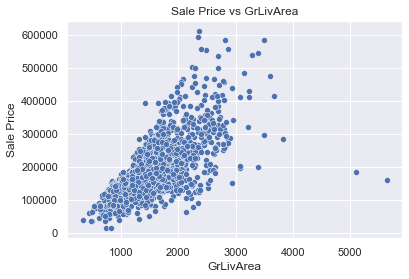

In [403]:
sns.scatterplot(data = house_train, x = "GrLivArea", y = "SalePrice")
plt.xlabel('GrLivArea')
plt.ylabel('Sale Price')
plt.title('Sale Price vs GrLivArea')

Text(0.5, 1.0, 'Sale Price vs LotFrontage')

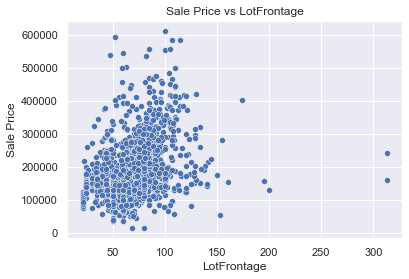

In [404]:
sns.scatterplot(data = house_train, x = "LotFrontage", y = "SalePrice")
plt.xlabel('LotFrontage')
plt.ylabel('Sale Price')
plt.title('Sale Price vs LotFrontage')

Text(0.5, 1.0, 'Sale Price vs LotArea')

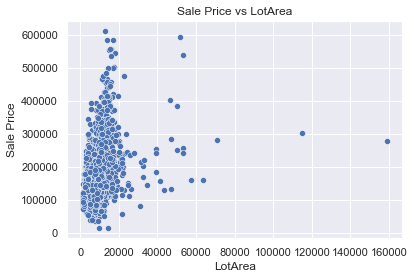

In [405]:
sns.scatterplot(data = house_train, x = "LotArea", y = "SalePrice")
plt.xlabel('LotArea')
plt.ylabel('Sale Price')
plt.title('Sale Price vs LotArea')

Text(0.5, 1.0, 'Sale Price vs MasVnrArea')

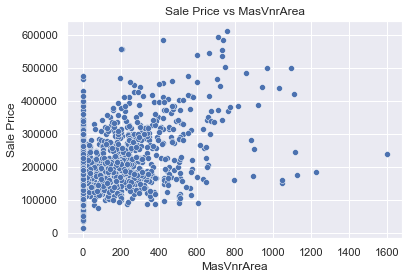

In [406]:
sns.scatterplot(data = house_train, x = "MasVnrArea", y = "SalePrice")
plt.xlabel('MasVnrArea')
plt.ylabel('Sale Price')
plt.title('Sale Price vs MasVnrArea')

Text(0.5, 1.0, 'Sale Price vs OpenPorchSF')

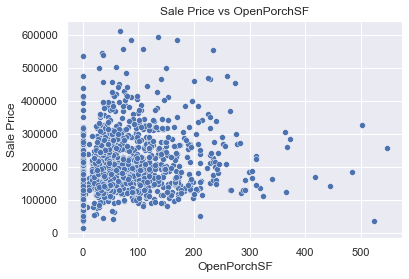

In [407]:
sns.scatterplot(data = house_train, x = "OpenPorchSF", y = "SalePrice")
plt.xlabel('OpenPorchSF')
plt.ylabel('Sale Price')
plt.title('Sale Price vs OpenPorchSF')

In [408]:
#dropping outlier but need a better way to spot them
house_train.drop(house_train[house_train.GrLivArea>4500].index, inplace=True)
house_train.drop(house_train[house_train.LotFrontage>300].index, inplace=True)
house_train.drop(house_train[house_train.LotArea>100000].index, inplace=True)
house_train.drop(house_train[house_train.MasVnrArea>1500].index, inplace=True)
house_train.drop(house_train[house_train.OpenPorchSF>500].index, inplace=True)

## EDA
After doing the necessary data cleaning, it is time to dive in further to performance some data analysis.

In [409]:
#separate columns to different datatype and analyze in details from there
house_train.select_dtypes(include=['object']).columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType'],
      dtype='object')

In [410]:
len(house_train.select_dtypes(include=['object']).columns)

38

In [411]:
house_train.select_dtypes(include=['int64']).columns

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [412]:
house_train.select_dtypes(include=['float64']).columns

Index(['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt',
       'GarageCars', 'GarageArea'],
      dtype='object')

**Note:** As there are too many columns to analyze, I have decided to split them up into numerical and then categorical (both nominal and ordinal type) to analyze separately.  They will go thru the standard analysis, correlation check and eventually, I will create a "holder" to contain features that make it to the final model for training. 
Here, we have 42 columns that were imported as 'object' datatype and would need to understand better (changing them to numerical eventually as model training can only understand numbers).

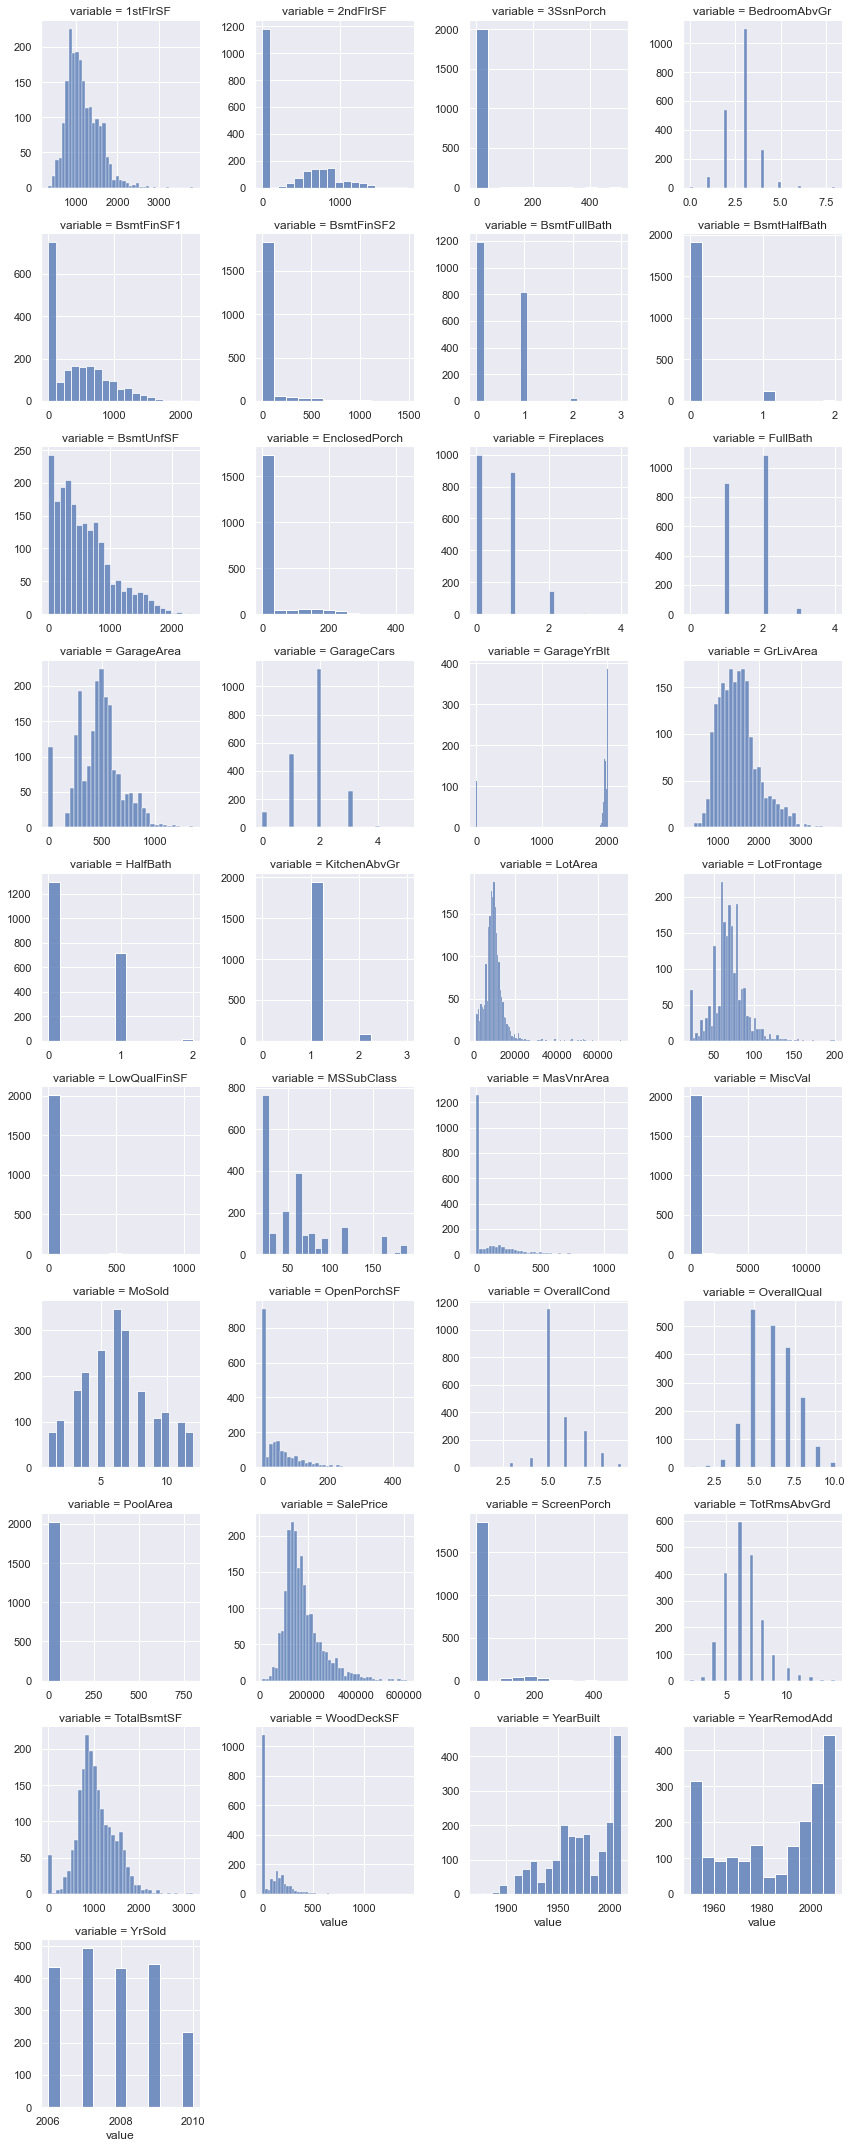

In [413]:
num_features = house_train.select_dtypes(include=['int64','float64']).columns
num_features = num_features.drop(['Id']) # drop ID and SalePrice
f = pd.melt(house_train, value_vars=sorted(num_features))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.histplot, 'value')

**Observation:**
1. Main objective is to make sure all numerical column are correct and making sure that ordinal column are correctly represented
2. MSSubClass probably need to represent in the form of categorical column (to convert into dummy variable) as it is not ordinal, the ordinal one are like 'OverallCond' (verified in the data dictionary)
3. Need to do some feature engineering later on some age related column like YrSold, YearBuilt and others
4. Notice some of the column distribution are skewed, like 'WoodDeckSF', 'SalePrice', 'LotFrontage', 'LotArea', 'GrLivArea', 'BsmtUnfSF' and few others
5. Notice some column are actually categorical and has been converted into numerical

**Looking into possible relationship with sale price**

As there are too many columns, I am doing scatterplot for all numerical columns firstly with sale price to get a sense the data landscape.

In [414]:
num_features_with_id = house_train.select_dtypes(include=['int64','float64']).columns
num_house_train = house_train[num_features_with_id]
num_house_train.head()
#sns.pairplot(house_train[num_features])

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0  109          60         70.0    13517            6            8       1976   
1  544          60         43.0    11492            7            5       1996   
2  153          20         68.0     7922            5            7       1953   
3  318          60         73.0     9802            5            5       2006   
4  255          50         82.0    14235            6            8       1900   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2005       289.0       533.0         0.0      192.0        725.0   
1          1997       132.0       637.0         0.0      276.0        913.0   
2          2007         0.0       731.0         0.0      326.0       1057.0   
3          2007         0.0         0.0         0.0      384.0        384.0   
4          1993         0.0         0.0         0.0      676.0        676.0   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       725       754             0       1479           0.0           0.0   
1       913      1209             0       2122           1.0           0.0   
2      1057         0             0       1057           1.0           0.0   
3       744       700             0       1444           0.0           0.0   
4       831       614             0       1445           0.0           0.0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             6           0   
1         2         1             4             1             8           1   
2         1         0             3             1             5           0   
3         2         1             3             1             7           0   
4         2         0             3             1             6           0   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       1976.0         2.0       475.0           0           44   
1       1997.0         2.0       559.0           0           74   
2       1953.0         1.0       246.0           0           52   
3       2007.0         2.0       400.0         100            0   
4       1957.0         2.0       484.0           0           59   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       3    2010   
1              0          0            0         0        0       4    2009   
2              0          0            0         0        0       1    2010   
3              0          0            0         0        0       4    2010   
4              0          0            0         0        0       3    2010   

   SalePrice  
0     130500  
1     220000  
2     109000  
3     174000  
4     138500

In [415]:
num_house_train.shape

(2035, 38)

In [416]:
slice_1 = num_house_train.iloc[:, 0:8]
slice_2 = num_house_train[['Id', 'SalePrice']]
slice_3 = pd.merge(slice_1, slice_2)
slice_3.drop('Id', inplace=True, axis=1)
slice_3.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         70.0    13517            6            8       1976   
1          60         43.0    11492            7            5       1996   
2          20         68.0     7922            5            7       1953   
3          60         73.0     9802            5            5       2006   
4          50         82.0    14235            6            8       1900   

   YearRemodAdd  SalePrice  
0          2005     130500  
1          1997     220000  
2          2007     109000  
3          2007     174000  
4          1993     138500

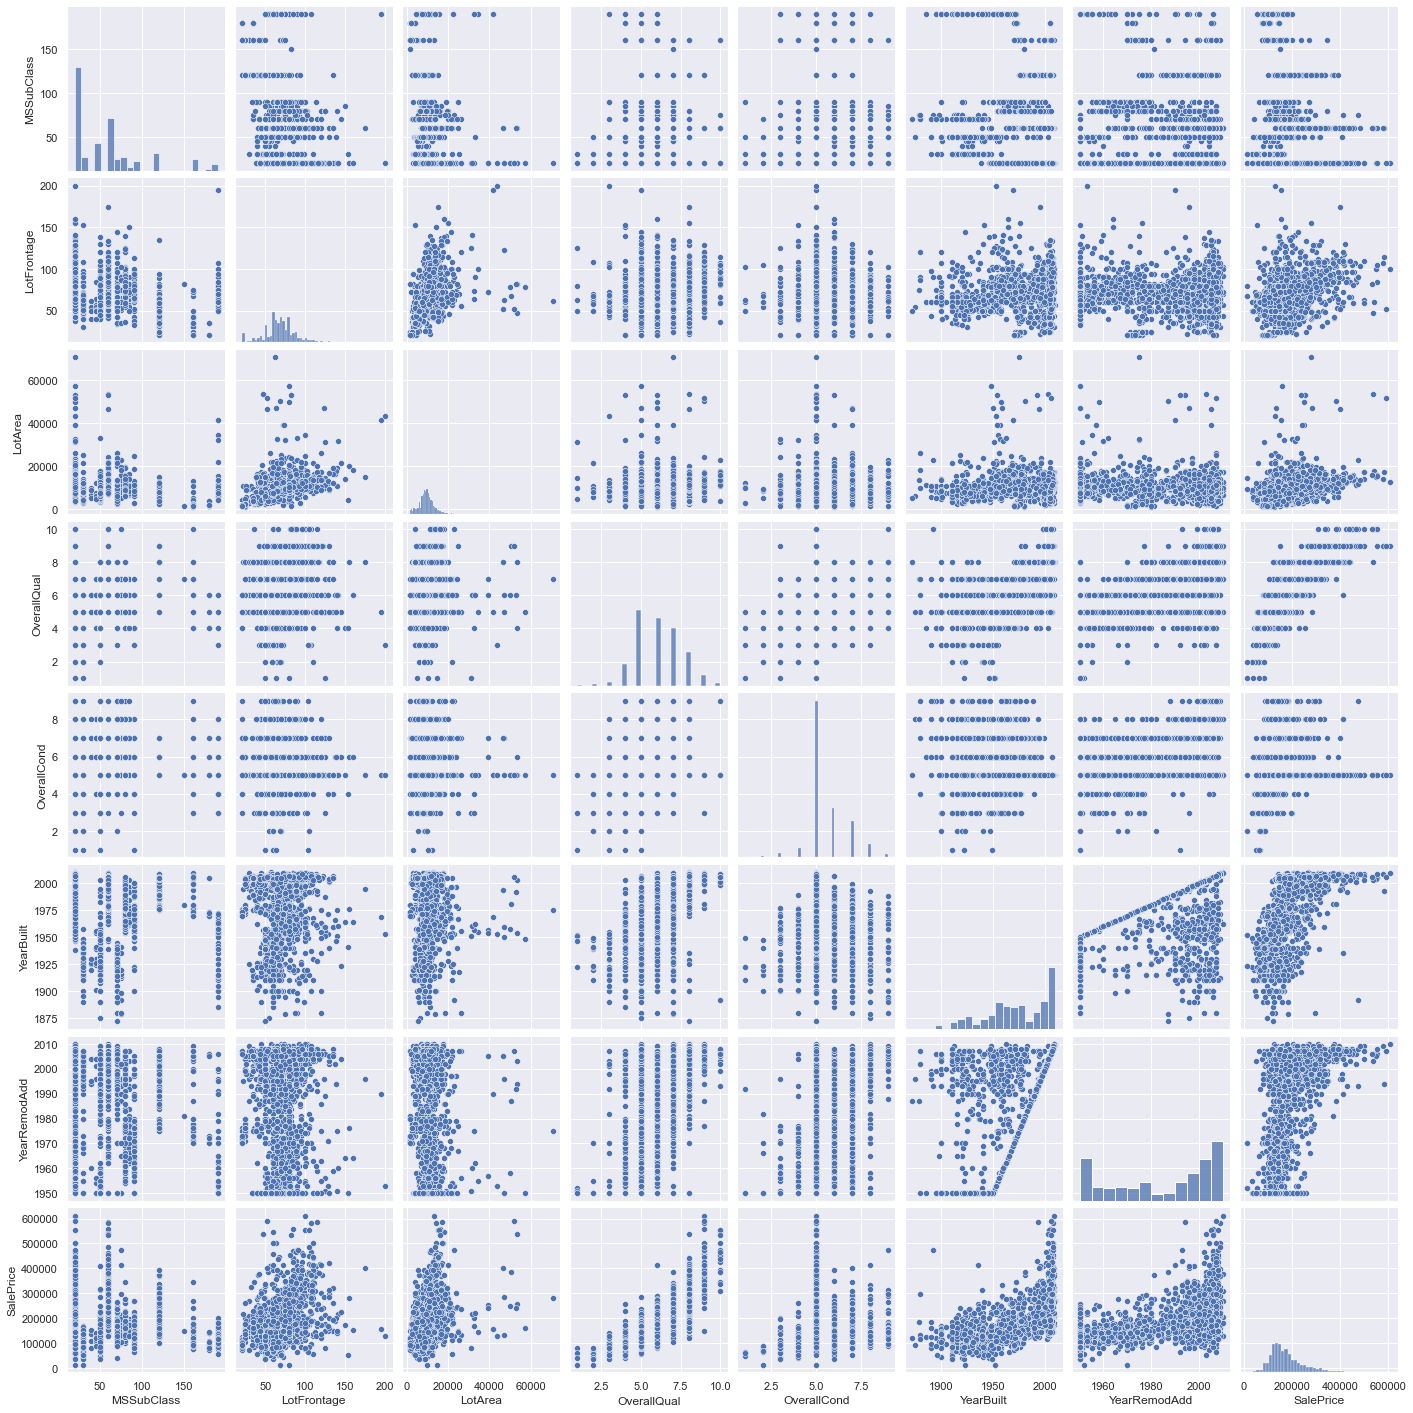

In [417]:
sns.pairplot(slice_3)

**Observation:**

1. MSSubClass, OverallQual (especially this column) and OverallCond looks correlated to SalePrice (to investigate further)

   MSSubClass - looking at the data dictionary, the trend line looks reasonable against sale price.  It seems the lower range 
   dwelling class command lower price (this may not be a nominal column as claimed by the data dictionary, could be ordinal)
   
   OverallQual - This clearly has a linear relationship with sale price and make economic sense (as quality goes up, it            commands higher price)
   
   Similarly for some of the column like YearBuilt.
2. We can also observe, although not so clear, that some of the columns are potentially correlated like OverallCond and OverallQual.  Need to investigate further later with correlation matrix and decide probably to drop some columns to avoid multicolinearity in the model.

In [418]:
slice_1 = num_house_train.iloc[:, 0:16]
slice_2 = num_house_train[['Id', 'SalePrice']]
slice_3 = pd.merge(slice_1, slice_2)
#df.columns[[1, 3]], axis=1
slice_3.drop(slice_3.columns[[0, 1, 2, 3, 4, 5, 6, 7]], inplace=True, axis=1)
#slice_3.drop('Id', inplace=True, axis=1)
slice_3.head()

MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
0       289.0       533.0         0.0      192.0        725.0       725   
1       132.0       637.0         0.0      276.0        913.0       913   
2         0.0       731.0         0.0      326.0       1057.0      1057   
3         0.0         0.0         0.0      384.0        384.0       744   
4         0.0         0.0         0.0      676.0        676.0       831   

   2ndFlrSF  LowQualFinSF  SalePrice  
0       754             0     130500  
1      1209             0     220000  
2         0             0     109000  
3       700             0     174000  
4       614             0     138500

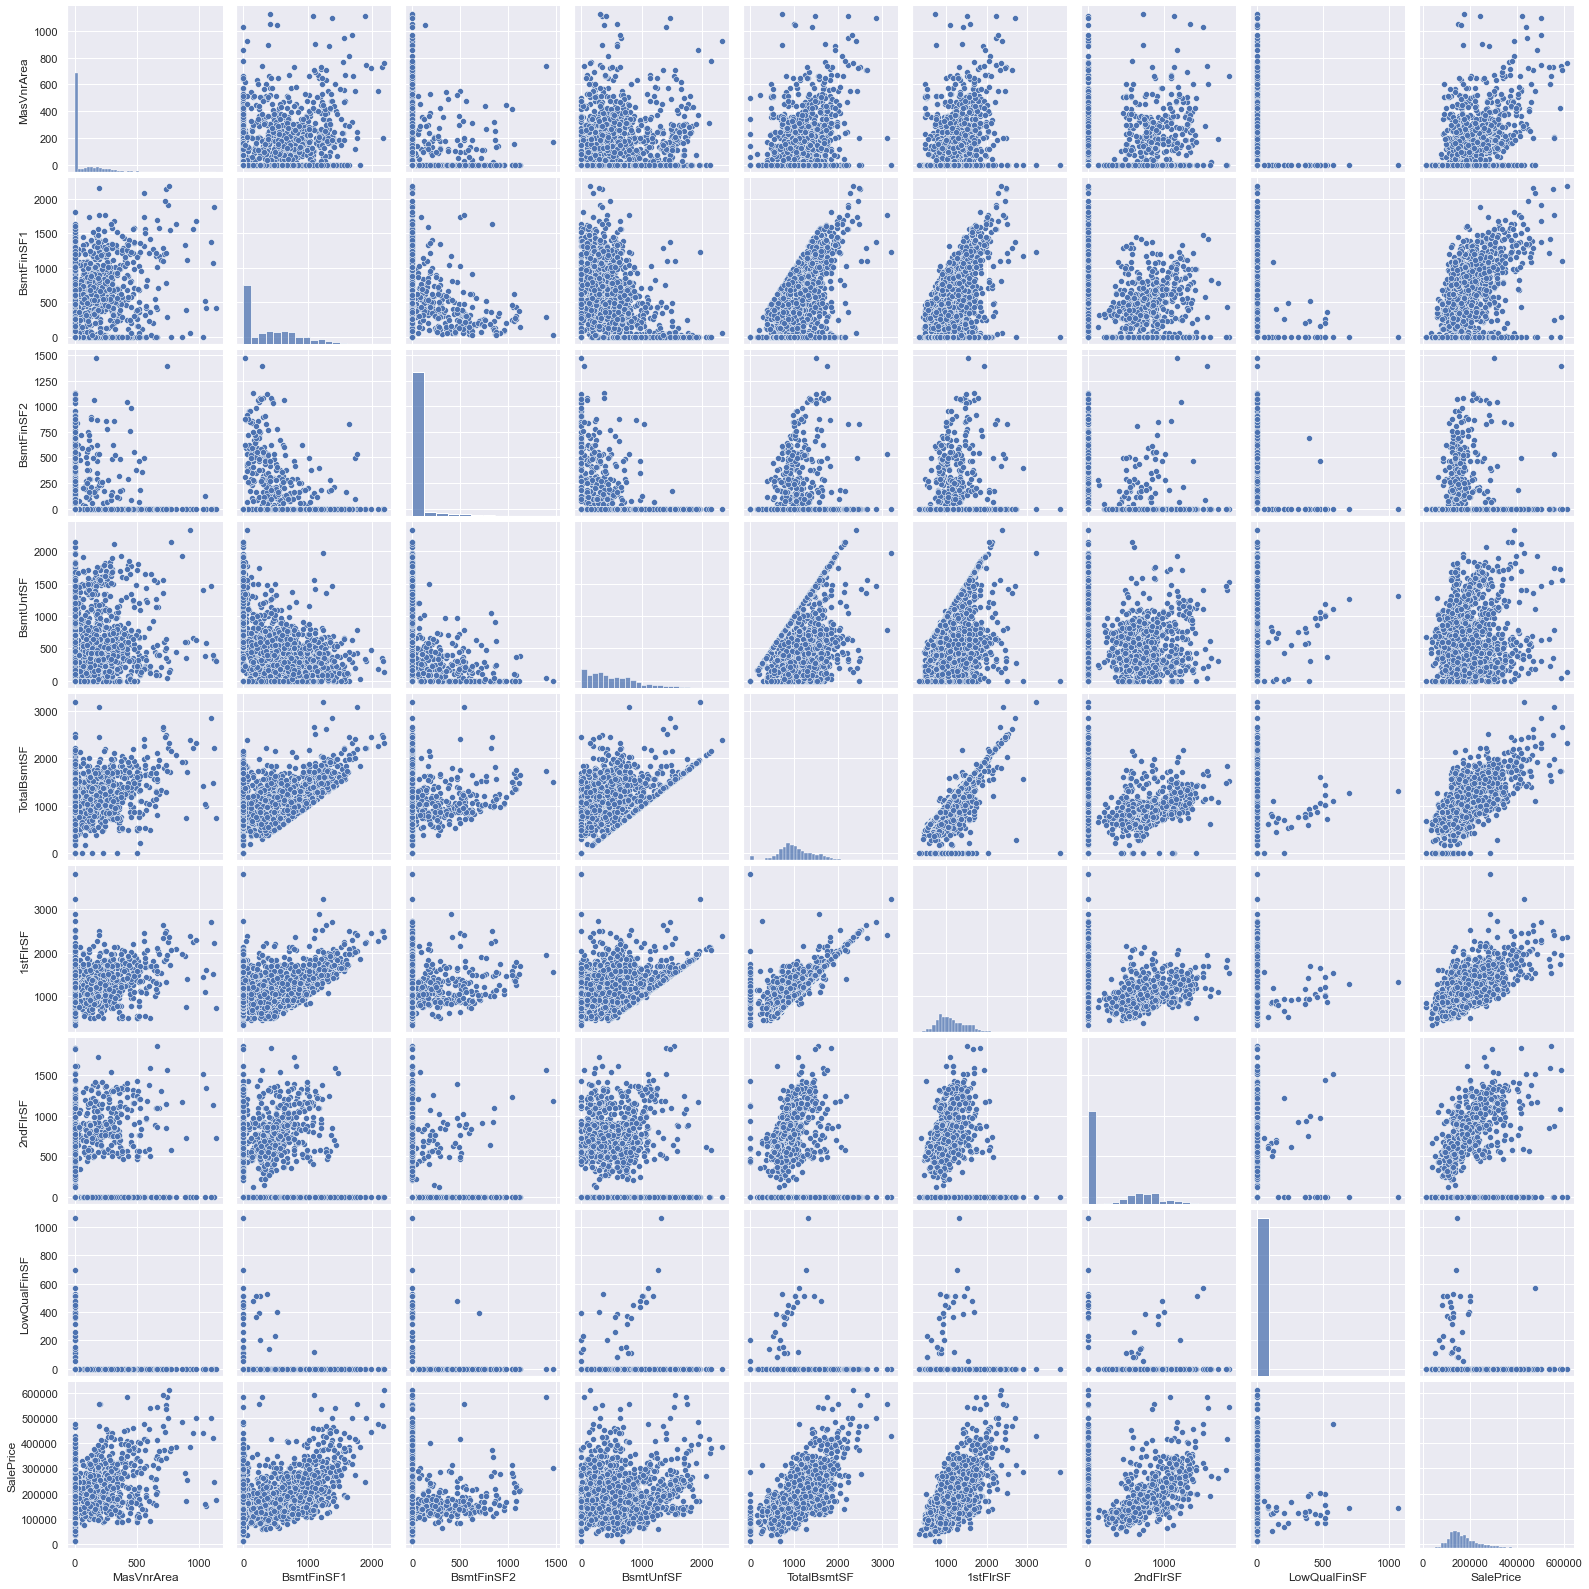

In [419]:
sns.pairplot(slice_3)

**Observation:**
1. It can be observed that all the basement related columns are potentially linearly related to sale price
2. It can also be observed that quite a few of the columns are correlated (potentially have to remove them to avoid multicolinearity)

In [420]:
slice_1 = num_house_train.iloc[:, 0:24]
slice_2 = num_house_train[['Id', 'SalePrice']]
slice_3 = pd.merge(slice_1, slice_2)
#df.columns[[1, 3]], axis=1
slice_3.drop(slice_3.columns[[0, 1, 2, 3, 4, 5, 6, 7,8,9,10,11,12,13,14,15]], inplace=True, axis=1)
#slice_3.drop('Id', inplace=True, axis=1)
slice_3.head()

GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1479           0.0           0.0         2         1             3   
1       2122           1.0           0.0         2         1             4   
2       1057           1.0           0.0         1         0             3   
3       1444           0.0           0.0         2         1             3   
4       1445           0.0           0.0         2         0             3   

   KitchenAbvGr  TotRmsAbvGrd  SalePrice  
0             1             6     130500  
1             1             8     220000  
2             1             5     109000  
3             1             7     174000  
4             1             6     138500

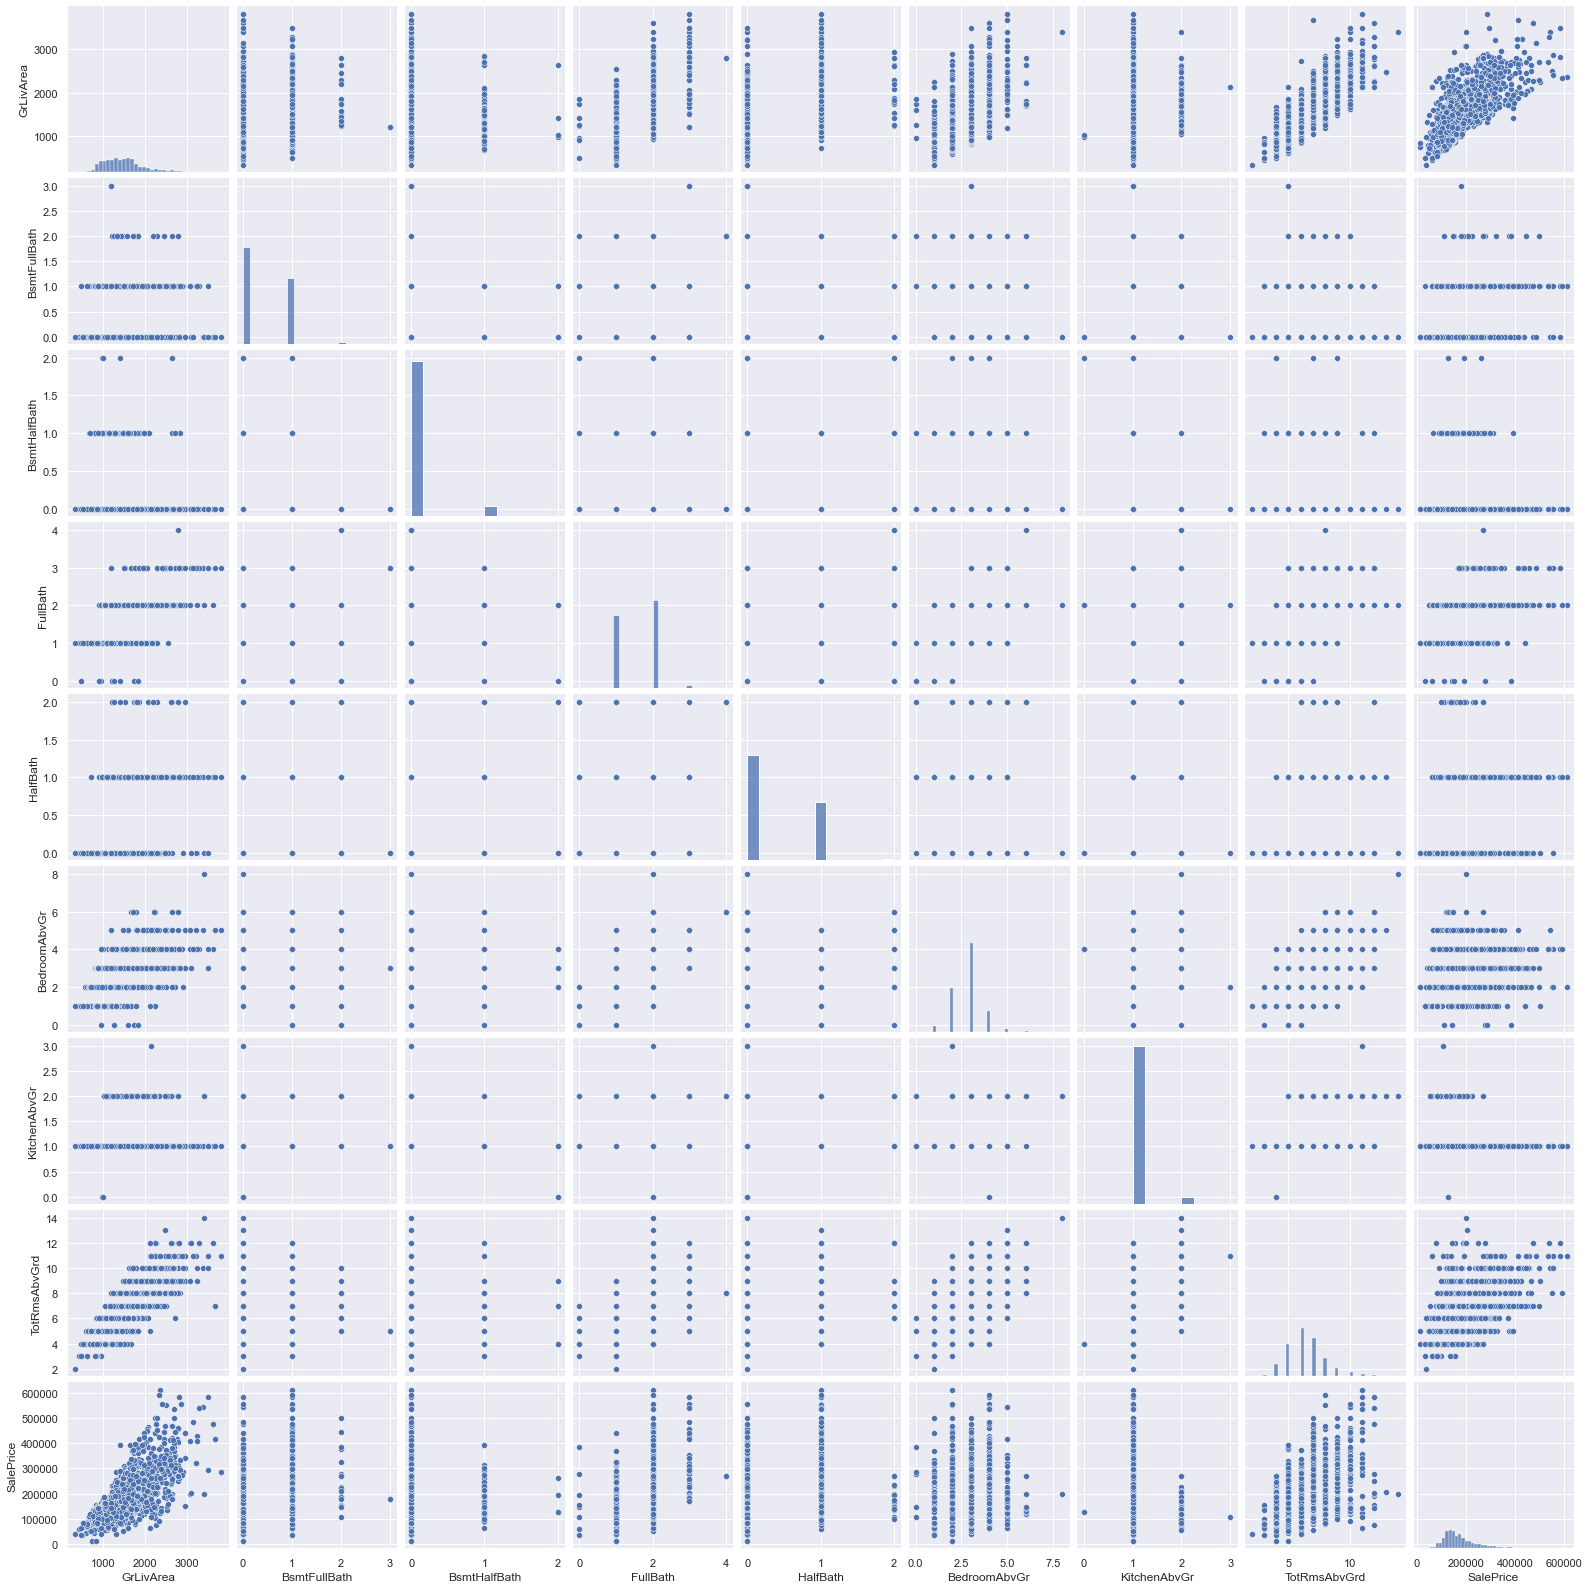

In [421]:
sns.pairplot(slice_3)

**Observation**:
1. Similarly, quite a number of columns has linear relationship with sale price.  For example, GrLivArea has a distinct relationship that can be observed and also for some of the categorical one, like TotRmsAbvGrd as well.

In [422]:
slice_1 = num_house_train.iloc[:, 0:32]
slice_2 = num_house_train[['Id', 'SalePrice']]
slice_3 = pd.merge(slice_1, slice_2)
#df.columns[[1, 3]], axis=1
slice_3.drop(slice_3.columns[[0, 1, 2, 3, 4, 5, 6, 7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22, 23, 24]], inplace=True, axis=1)
#slice_3.drop('Id', inplace=True, axis=1)
slice_3.head()

GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       1976.0         2.0       475.0           0           44   
1       1997.0         2.0       559.0           0           74   
2       1953.0         1.0       246.0           0           52   
3       2007.0         2.0       400.0         100            0   
4       1957.0         2.0       484.0           0           59   

   EnclosedPorch  3SsnPorch  SalePrice  
0              0          0     130500  
1              0          0     220000  
2              0          0     109000  
3              0          0     174000  
4              0          0     138500

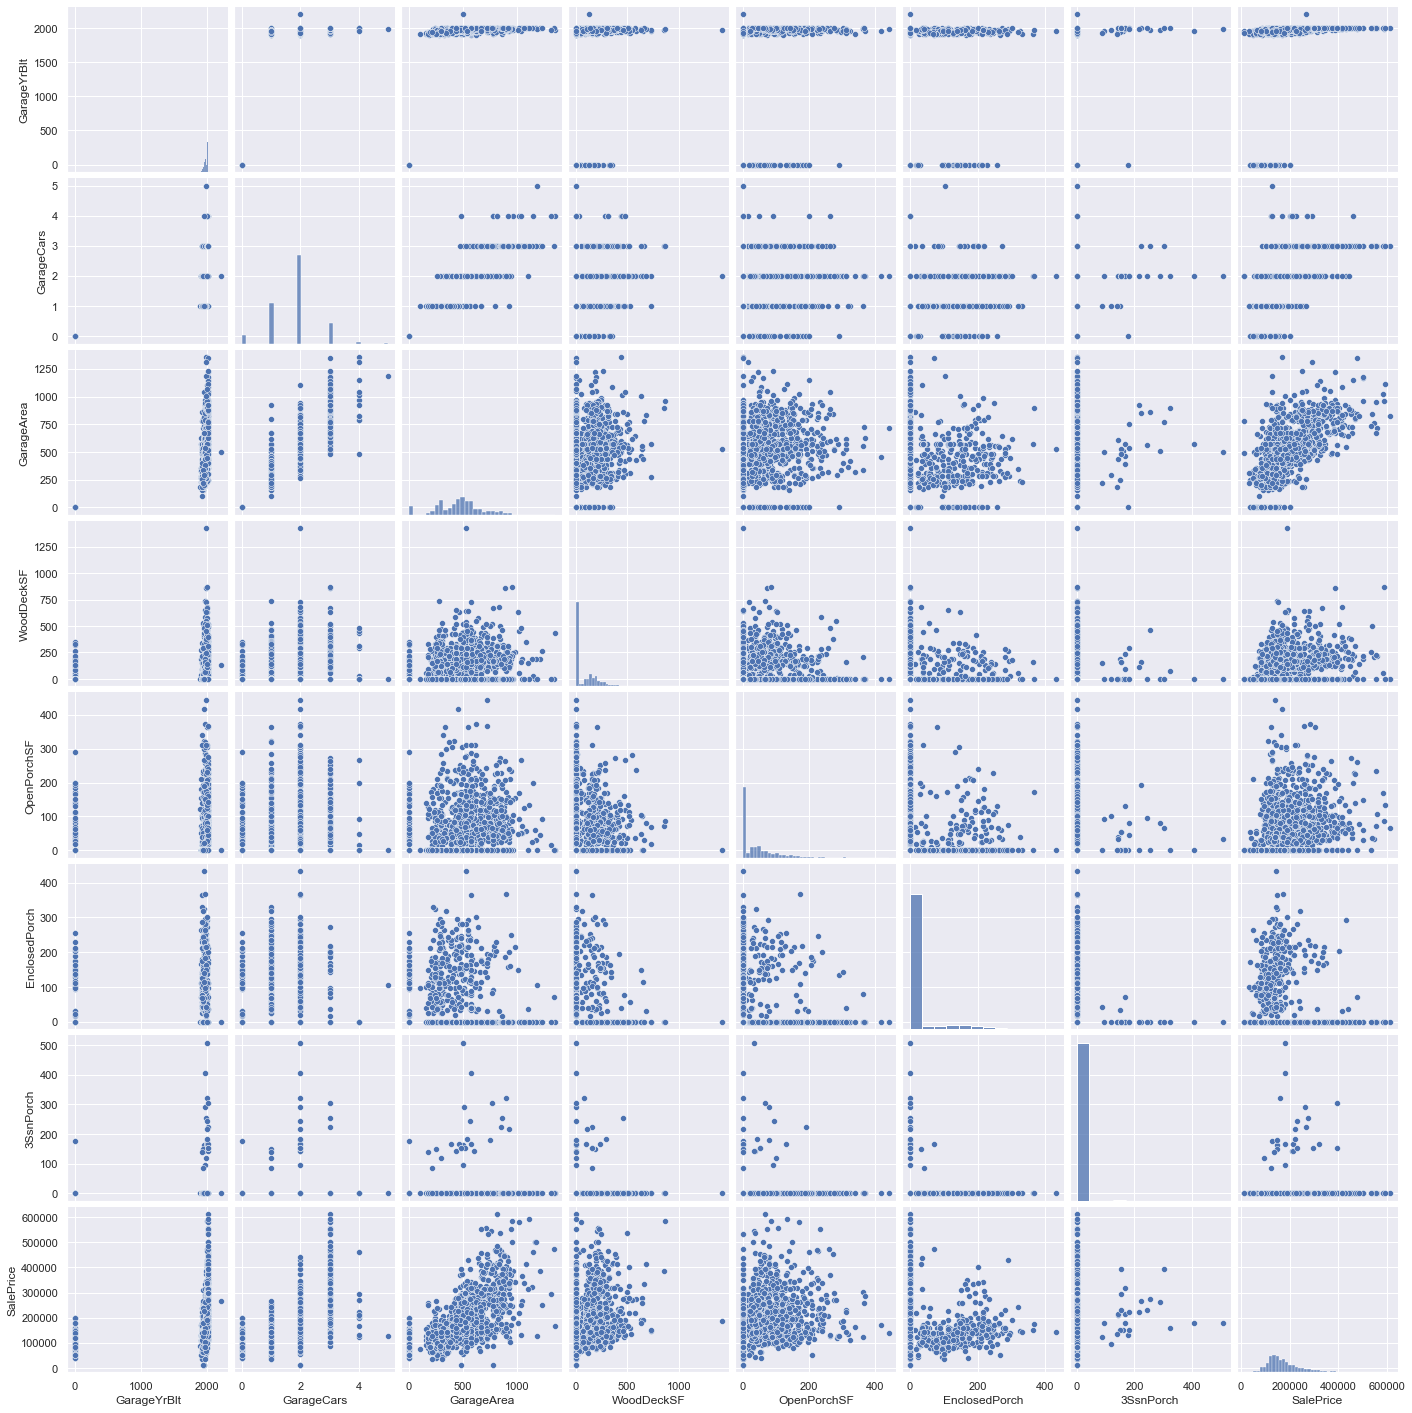

In [423]:
sns.pairplot(slice_3)

**Observation:**
Here we can see the "Garage" related column has linear relationship with sale price.

In [424]:
slice_1 = num_house_train.iloc[:, 0:37]
slice_2 = num_house_train[['Id', 'SalePrice']]
slice_3 = pd.merge(slice_1, slice_2)
#df.columns[[1, 3]], axis=1
slice_3.drop(slice_3.columns[[0, 1, 2, 3, 4, 5, 6, 7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22, 23, 24, 25, 26, 27, 28, 29, 30, 31]], inplace=True, axis=1)
#slice_3.drop('Id', inplace=True, axis=1)
slice_3.head()

ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SalePrice
0            0         0        0       3    2010     130500
1            0         0        0       4    2009     220000
2            0         0        0       1    2010     109000
3            0         0        0       4    2010     174000
4            0         0        0       3    2010     138500

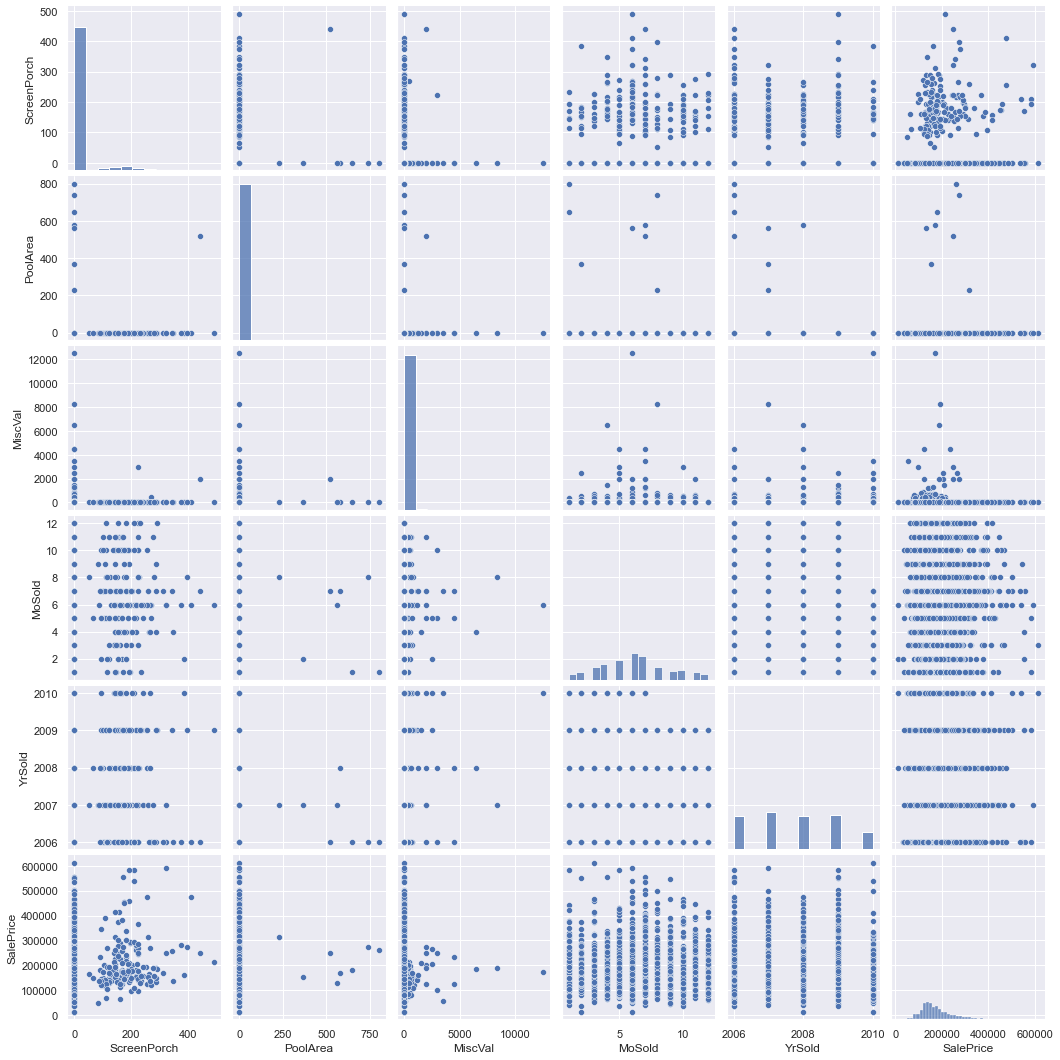

In [425]:
sns.pairplot(slice_3)

**Observation:**
Here, we don't observe much relationship with sale price.  Overall conclusion for this initial EDA effort points to the fact that we do have some good data to start with the regression model development.  Next, we will move into correlation matrix to do a quick screening and hopefully we can simplify further by selecting the features which really matters.

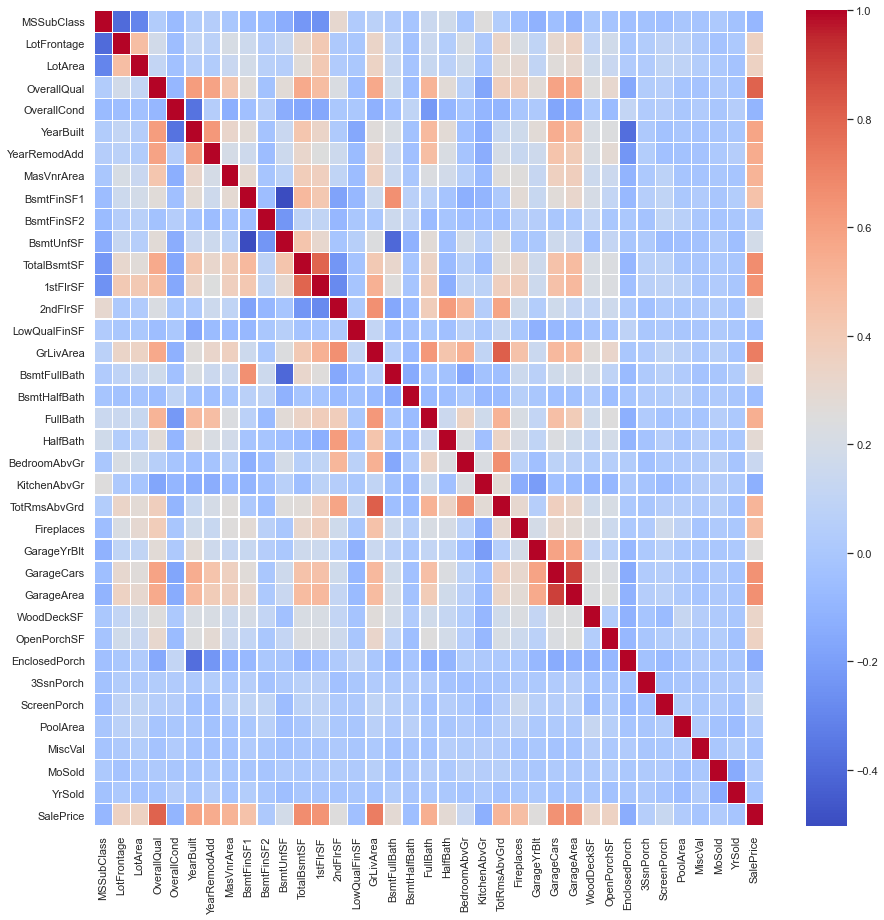

In [426]:
plt.figure(figsize=(15, 15))
corr_matrix = house_train[num_features].corr()
sns.heatmap(corr_matrix, cmap='coolwarm', linewidths=.5, xticklabels=True, yticklabels=True)
plt.show()

**Observation:**
Visually, we are able to see high correlation btw columns like 'OverallQual' to sale price which was earlier observed in the scatterplot as well.  Next, I have developed some simple code to extract out the "relevant" features to simplify and reduce dimensionality curse.  I have initially chosen columns with correlation that is more than 0.5 and proceed with the model development.  However, it didn't achieve better performance (both R^2 and RMSE).  Hence, I have lower my threshold to include more features.

In [427]:
#here we define separate features holder to contain selected features as we progress
selected_num_features = house_train[num_features]

In [428]:
#capture the list of columns that we want to keep and drop based on the correlation
corr_var = house_train[num_features].corr()
featureToDrop = []
featureToKeep = []
#couldn't find a method that returns that, so custom develope
for i in range(len(corr_var)):
    if corr_var.index[i] == 'SalePrice':
        pointer = i
for j in range(len(corr_var)):
    corr = abs(corr_var.iloc[pointer, j])
    if (corr >= 0.2):
        if (corr_var.index[j] != 'SalePrice'):
            featureToKeep.append(corr_var.index[j])
    else:
            featureToDrop.append(corr_var.index[j])
#remember to drop SalePrice from the feature to keep array
print(f"Features to keep: {featureToKeep}")

Features to keep: ['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF']


In [429]:
#Features remove for the time being
print(f"Features to drop: {featureToDrop}")

Features to drop: ['MSSubClass', 'OverallCond', 'BsmtFinSF2', 'BsmtUnfSF', 'LowQualFinSF', 'BsmtHalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


Here, I have created a "collector" of features and along the way, I shall add "qualified" features to it.

In [430]:
features_for_model = featureToKeep

In [431]:
corr_matrix

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass       1.000000    -0.395721 -0.302793     0.037026    -0.070195   
LotFrontage     -0.395721     1.000000  0.469865     0.178788    -0.050911   
LotArea         -0.302793     0.469865  1.000000     0.109133    -0.037804   
OverallQual      0.037026     0.178788  0.109133     1.000000    -0.086031   
OverallCond     -0.070195    -0.050911 -0.037804    -0.086031     1.000000   
YearBuilt        0.035438     0.111671  0.045543     0.608132    -0.367093   
YearRemodAdd     0.045415     0.073422  0.031826     0.584011     0.043334   
MasVnrArea       0.001302     0.209117  0.142117     0.430502    -0.131685   
BsmtFinSF1      -0.059549     0.154920  0.186014     0.269458    -0.042604   
BsmtFinSF2      -0.067480     0.046831  0.063514    -0.028539     0.048873   
BsmtUnfSF       -0.136960     0.127963  0.049272     0.274083    -0.134420   
TotalBsmtSF     -0.231741     0.313228  0.269479     0.555940    -0.166122   
1stFlrSF        -0.252559     0.411636  0.410131     0.473624    -0.158535   
2ndFlrSF         0.306402     0.017395  0.028892     0.228509     0.006519   
LowQualFinSF     0.031244    -0.000296  0.005195    -0.052095     0.004823   
GrLivArea        0.074727     0.336535  0.346018     0.564493    -0.117527   
BsmtFullBath     0.028004     0.093468  0.127282     0.172311    -0.038480   
BsmtHalfBath    -0.015102    -0.027536 -0.020524    -0.051415     0.099621   
FullBath         0.143413     0.146075  0.136762     0.514784    -0.224983   
HalfBath         0.177454     0.037885  0.073925     0.272633    -0.093769   
BedroomAbvGr    -0.002104     0.216622  0.170109     0.055726    -0.015314   
KitchenAbvGr     0.253126     0.017170 -0.010709    -0.171078    -0.096069   
TotRmsAbvGrd     0.039339     0.332054  0.278940     0.375142    -0.098383   
Fireplaces      -0.052058     0.222853  0.297221     0.383856    -0.008865   
GarageYrBlt     -0.113241     0.096610  0.103328     0.275218     0.015173   
GarageCars      -0.047163     0.304857  0.264847     0.587936    -0.170598   
GarageArea      -0.106712     0.349136  0.305113     0.558188    -0.140887   
WoodDeckSF       0.005190     0.112945  0.176416     0.253864     0.013009   
OpenPorchSF     -0.017046     0.173035  0.141992     0.311838    -0.067850   
EnclosedPorch   -0.039291     0.001163  0.031076    -0.152257     0.109565   
3SsnPorch       -0.030157     0.033656  0.028655     0.032797     0.027073   
ScreenPorch     -0.039033     0.087991  0.099246     0.051039     0.044047   
PoolArea        -0.005222     0.074560  0.090325    -0.010489    -0.002747   
MiscVal         -0.019554     0.014627  0.040478    -0.022360     0.026355   
MoSold           0.013508    -0.021851  0.009908     0.019698    -0.003769   
YrSold          -0.029096     0.011697 -0.024019    -0.011364     0.047096   
SalePrice       -0.088249     0.359147  0.352077     0.803876    -0.101433   

               YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
MSSubClass      0.035438      0.045415    0.001302   -0.059549   -0.067480   
LotFrontage     0.111671      0.073422    0.209117    0.154920    0.046831   
LotArea         0.045543      0.031826    0.142117    0.186014    0.063514   
OverallQual     0.608132      0.584011    0.430502    0.269458   -0.028539   
OverallCond    -0.367093      0.043334   -0.131685   -0.042604    0.048873   
YearBuilt       1.000000      0.629671    0.322261    0.279378   -0.022344   
YearRemodAdd    0.629671      1.000000    0.200562    0.165227   -0.057496   
MasVnrArea      0.322261      0.200562    1.000000    0.291319   -0.014597   
BsmtFinSF1      0.279378      0.165227    0.291319    1.000000   -0.052403   
BsmtFinSF2     -0.022344     -0.057496   -0.014597   -0.052403    1.000000   
BsmtUnfSF       0.137979      0.159625    0.083416   -0.502622   -0.235209   
TotalBsmtSF     0.425918      0.316448    0.384111    0.490249    0.088889   
1stFlrSF        0.331983      0.2437

**Selecting highly correlated columns to drop to avoid multicolinearity:**

In [432]:
#avoid mulitcolinearity
corr_matrix = house_train[num_features].corr()
featuresCorrelatedCol = []
featuresCorrelatedRow = []
featureToDrop = []
featureNotDrop = []
for i in range(len(corr_matrix)):
    if corr_matrix.columns[i] != 'SalePrice':
        column_feature = corr_matrix.columns[i]
        for j in range(len(corr_matrix)):
            corr = abs(corr_matrix.iloc[i][j])
            if (corr >= 0.75):
                if (column_feature != corr_matrix.index[j] and corr_matrix.index[j] != 'SalePrice'):
                    featuresCorrelatedCol.append(column_feature)
                    featuresCorrelatedRow.append(corr_matrix.index[j])
cor_table = {
    'Features 1' : featuresCorrelatedCol,
    'Features 2' : featuresCorrelatedRow,
}
# creating a Dataframe object 
df = pd.DataFrame(cor_table)
df

Features 1    Features 2
0   TotalBsmtSF      1stFlrSF
1      1stFlrSF   TotalBsmtSF
2     GrLivArea  TotRmsAbvGrd
3  TotRmsAbvGrd     GrLivArea
4    GarageCars    GarageArea
5    GarageArea    GarageCars

In [433]:
#retrieve the correlation of the above features with 'SalePrice' to decide on which have a stronger relationship and shall keep that
selected_features = []
i = 0
while i < len(featuresCorrelatedCol)/2:
    counter = i*2
    corr_1 = corr_matrix.at['SalePrice', featuresCorrelatedCol[counter]]
    corr_2 = corr_matrix.at['SalePrice', featuresCorrelatedCol[counter+1]]
    if (corr_1 > corr_2):
        selected_features.append(featuresCorrelatedCol[counter])
    else:
        selected_features.append(featuresCorrelatedCol[counter+1])
    i += 1
selected_features

['TotalBsmtSF', 'GrLivArea', 'GarageArea']

In [434]:
features_for_model 

['LotFrontage',
 'LotArea',
 'OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF']

**Drop the related features found above from the list:**

In [435]:
features_for_model.remove('GarageCars')
features_for_model.remove('TotRmsAbvGrd')
features_for_model.remove('1stFlrSF')

C:\Users\weeho\anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


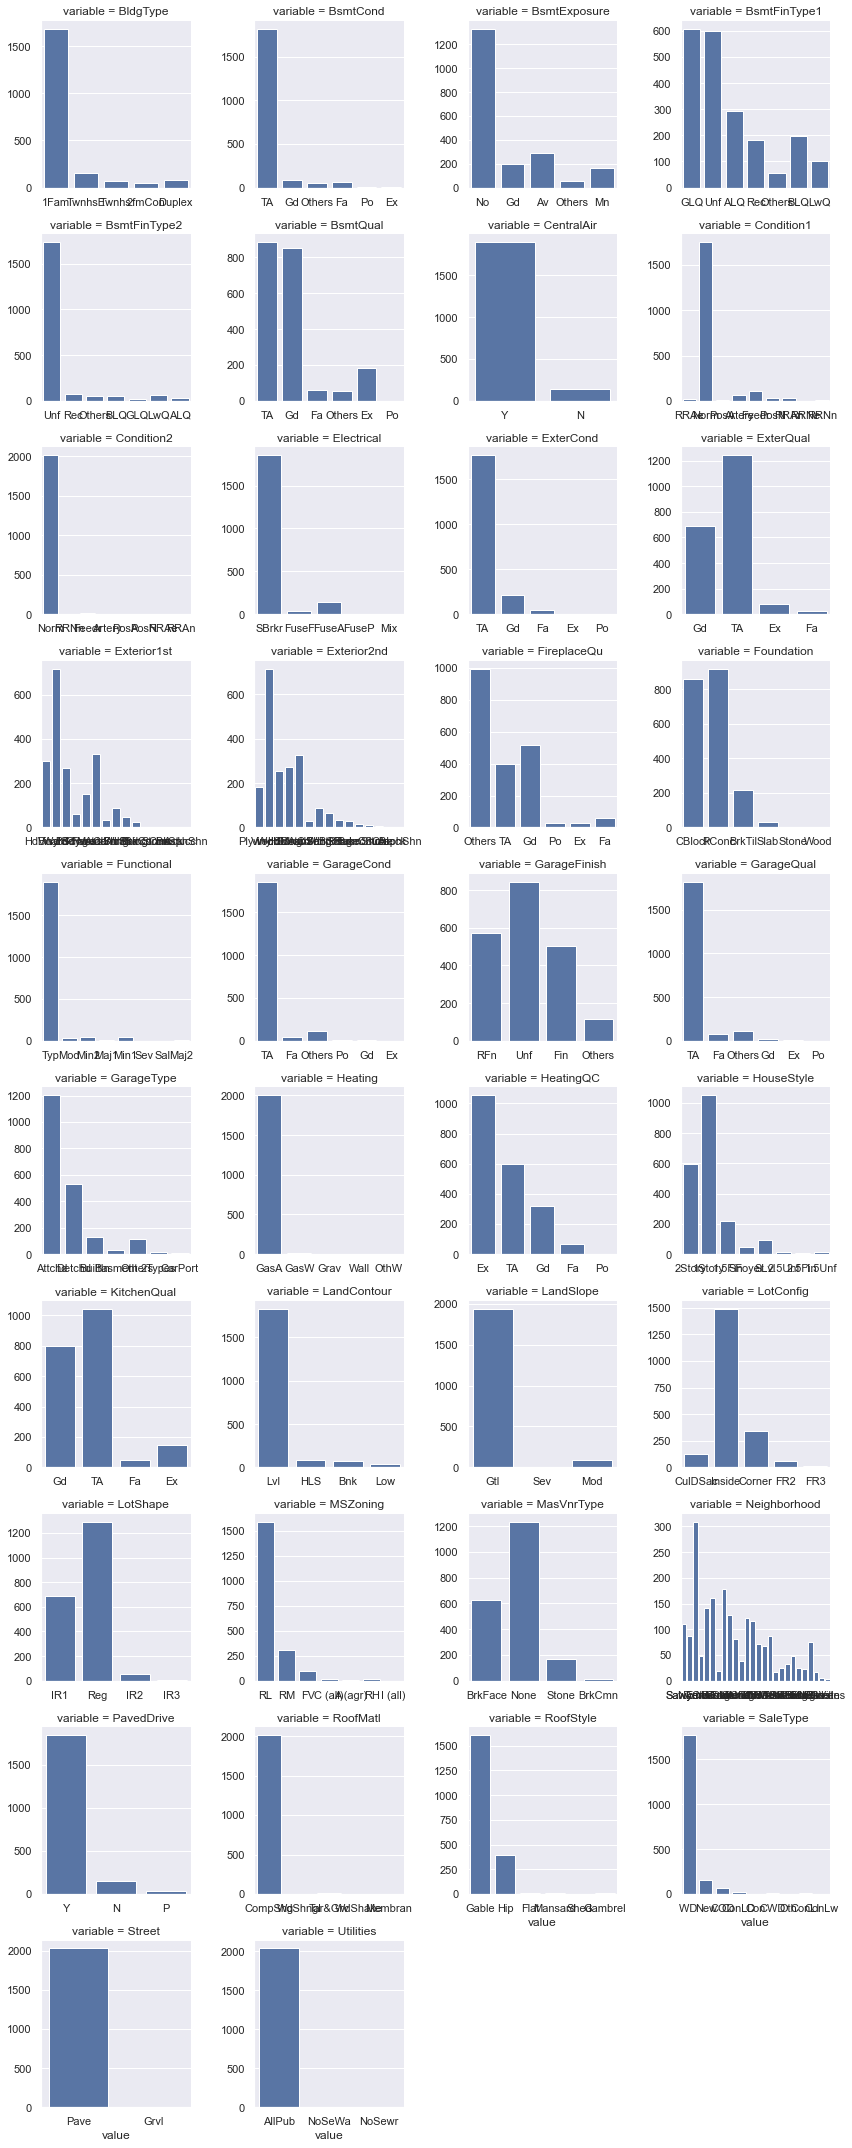

In [436]:
cat_features = house_train.select_dtypes(include=['object']).columns
f = pd.melt(house_train, value_vars=sorted(cat_features))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.countplot, 'value')

In [437]:
cat_features_list = cat_features.tolist()
cat_features_list.append('SalePrice')
cat_train = house_train[cat_features_list]
len(cat_train.columns)

39

#### Categorical Column Visualization
Next, I will perform some boxplot on the "categorical features" for better understanding of the data.  Similarly, since there are too many features, I will combin few of them into 1 plot but shall do a separate one if I find some interesting.

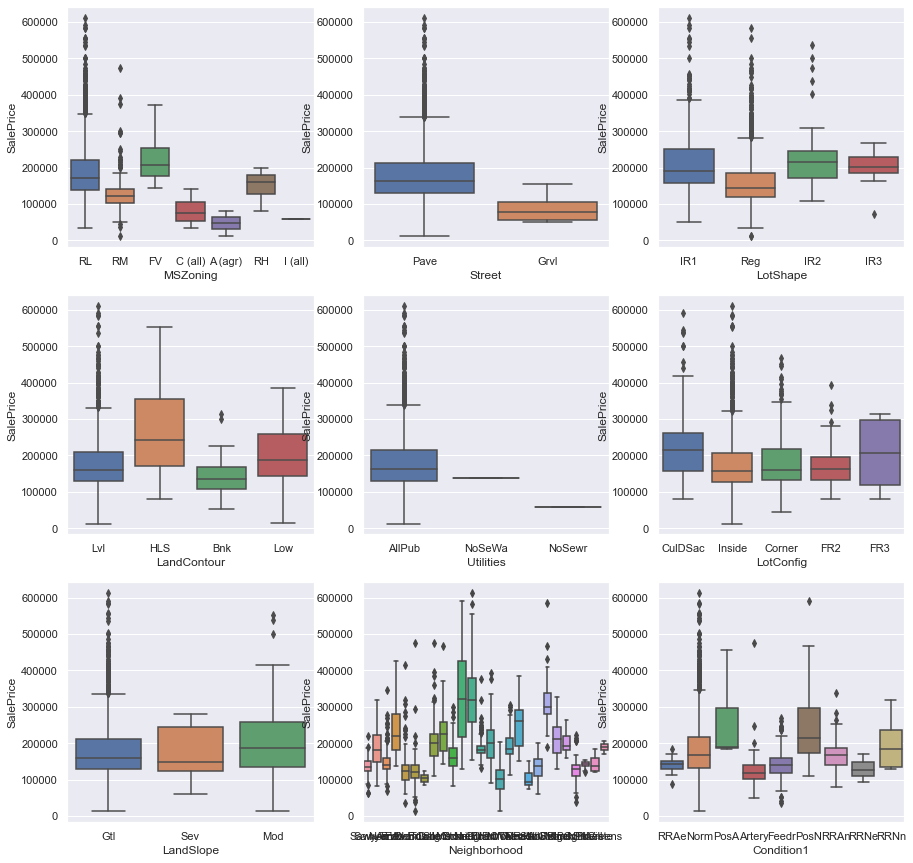

In [438]:
#define plotting region (2 rows, 2 columns)
fig, axes = plt.subplots(3, 3, figsize=(15,15))
#cat_train = house_train[cat_features]
#create boxplot in each subplot
sns.boxplot(data=cat_train, x=cat_train.columns[0], y='SalePrice', ax=axes[0,0])
sns.boxplot(data=cat_train, x=cat_train.columns[1], y='SalePrice', ax=axes[0,1])
sns.boxplot(data=cat_train, x=cat_train.columns[2], y='SalePrice', ax=axes[0,2])
sns.boxplot(data=cat_train, x=cat_train.columns[3], y='SalePrice', ax=axes[1,0])
sns.boxplot(data=cat_train, x=cat_train.columns[4], y='SalePrice', ax=axes[1,1])
sns.boxplot(data=cat_train, x=cat_train.columns[5], y='SalePrice', ax=axes[1,2])
sns.boxplot(data=cat_train, x=cat_train.columns[6], y='SalePrice', ax=axes[2,0])
sns.boxplot(data=cat_train, x=cat_train.columns[7], y='SalePrice', ax=axes[2,1])
sns.boxplot(data=cat_train, x=cat_train.columns[8], y='SalePrice', ax=axes[2,2])
plt.show()

**Observation:** 
Few interesting observation here,
1. For 'Street', it looks clear that for the type of road access to property, "Paved" clearly commands a high premium.
2. For 'LandCountour', it looks logical although some of the features aren't apparent to me.  But for houses that are on hillside, seems to command higher sales price and it probably could be due to the view.
        Land Contour (Nominal): Flatness of the property
           Lvl	Near Flat/Level	
           Bnk	Banked - Quick and significant rise from street grade to building
           HLS	Hillside - Significant slope from side to side
           Low	Depression
3. I have also observed some of the feature like 'Utilities' does not give much information value, shall be removing them along the way.
4. Re-plotting some view like 'Neighborhood' to see if we can derive interesting observation there.

Text(0.5, 0, 'Neighborhood')

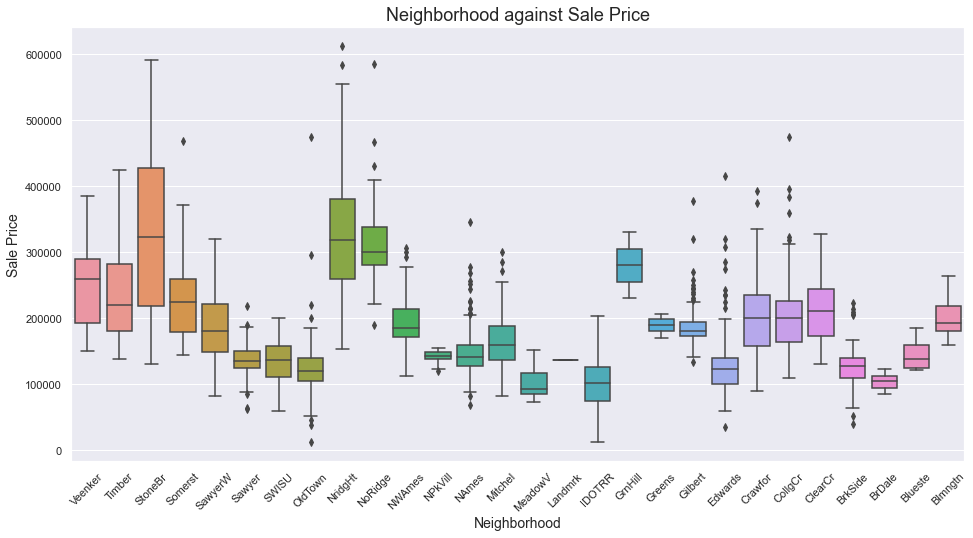

In [188]:
plt.figure(figsize=(16, 8))
sns.boxplot(data=cat_train, x=cat_train['Neighborhood'].sort_values(ascending=False), y=cat_train['SalePrice'])
plt.xticks(rotation=45);
plt.title('Neighborhood against Sale Price', fontsize=18)
plt.ylabel('Sale Price', fontsize=14)
plt.xlabel('Neighborhood', fontsize=14)

This plot also further verify the golden rule of "Location, Location, Location!".  It can be observed that some neighbourhood does command a high premium, like NridgHt and StoneBr.  And there are some that really falls under the lower spectrum of sale price, like MeadowV.

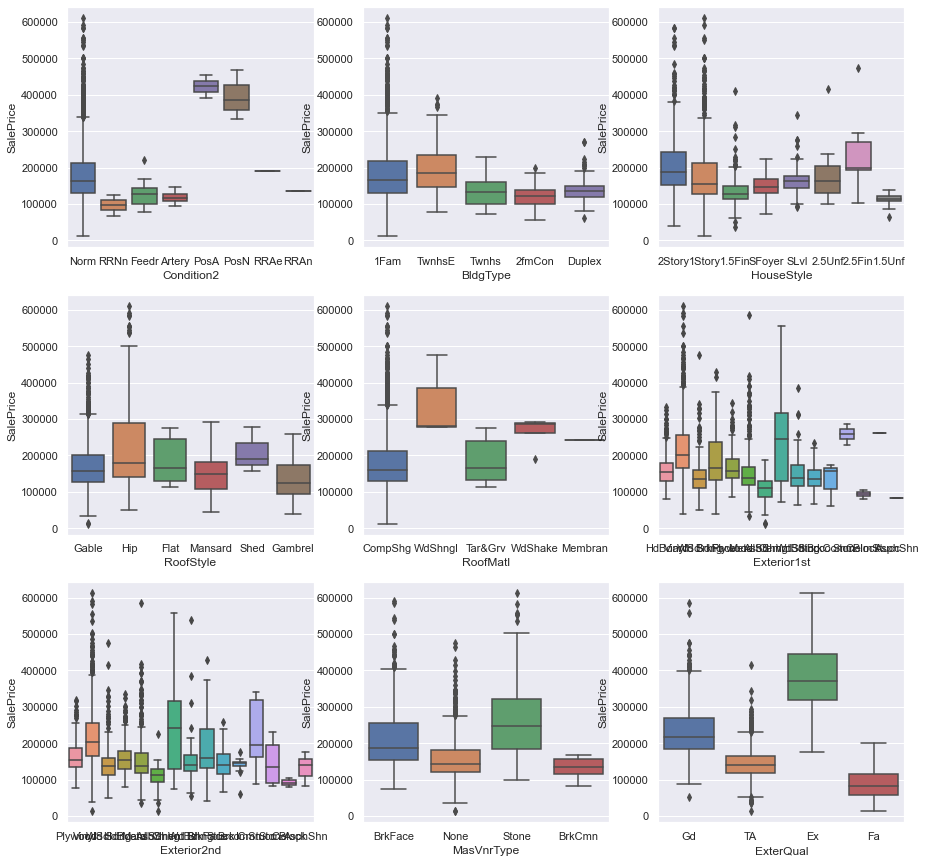

In [189]:
sns.set()
#define plotting region (2 rows, 2 columns)
fig, axes = plt.subplots(3, 3, figsize=(15,15))
#cat_train = house_train[cat_features]
#create boxplot in each subplot
sns.boxplot(data=cat_train, x=cat_train.columns[9], y='SalePrice', ax=axes[0,0])
sns.boxplot(data=cat_train, x=cat_train.columns[10], y='SalePrice', ax=axes[0,1])
sns.boxplot(data=cat_train, x=cat_train.columns[11], y='SalePrice', ax=axes[0,2])
sns.boxplot(data=cat_train, x=cat_train.columns[12], y='SalePrice', ax=axes[1,0])
sns.boxplot(data=cat_train, x=cat_train.columns[13], y='SalePrice', ax=axes[1,1])
sns.boxplot(data=cat_train, x=cat_train.columns[14], y='SalePrice', ax=axes[1,2])
sns.boxplot(data=cat_train, x=cat_train.columns[15], y='SalePrice', ax=axes[2,0])
sns.boxplot(data=cat_train, x=cat_train.columns[16], y='SalePrice', ax=axes[2,1])
sns.boxplot(data=cat_train, x=cat_train.columns[17], y='SalePrice', ax=axes[2,2])
plt.show()

**Observation:**
Similarly, some of the columns like 'MasVnrType' and 'ExterQual' does have attributes which command higher sale price and has ordinal effect.  For example, with excellent quality in 'ExterQual', it clearly has a median price much much higher than the rest.  This column should be part of the features considered in the model.

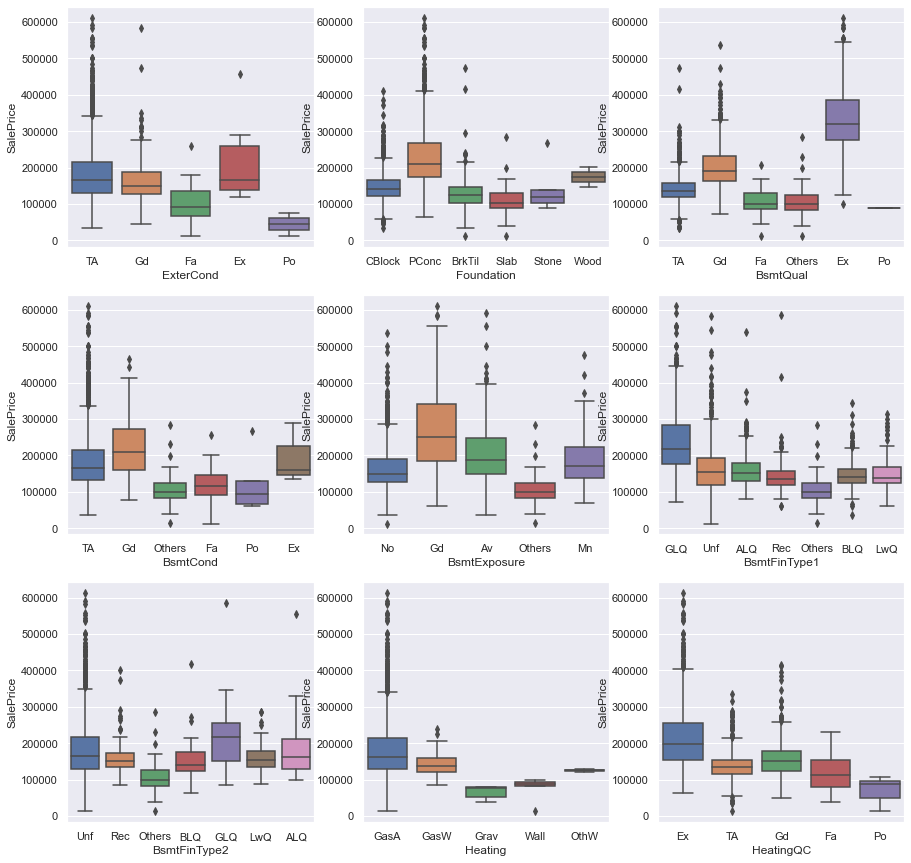

In [190]:
sns.set()
#define plotting region (2 rows, 2 columns)
fig, axes = plt.subplots(3, 3, figsize=(15,15))
#cat_train = house_train[cat_features]
#create boxplot in each subplot
sns.boxplot(data=cat_train, x=cat_train.columns[18], y='SalePrice', ax=axes[0,0])
sns.boxplot(data=cat_train, x=cat_train.columns[19], y='SalePrice', ax=axes[0,1])
sns.boxplot(data=cat_train, x=cat_train.columns[20], y='SalePrice', ax=axes[0,2])
sns.boxplot(data=cat_train, x=cat_train.columns[21], y='SalePrice', ax=axes[1,0])
sns.boxplot(data=cat_train, x=cat_train.columns[22], y='SalePrice', ax=axes[1,1])
sns.boxplot(data=cat_train, x=cat_train.columns[23], y='SalePrice', ax=axes[1,2])
sns.boxplot(data=cat_train, x=cat_train.columns[24], y='SalePrice', ax=axes[2,0])
sns.boxplot(data=cat_train, x=cat_train.columns[25], y='SalePrice', ax=axes[2,1])
sns.boxplot(data=cat_train, x=cat_train.columns[26], y='SalePrice', ax=axes[2,2])
plt.show()

**Observation:**
Similar observation can be found here for most of the ordinal features as it clearly rank order the saleprice that can be commanded, like 'HeatingQC' and most of the basement related attributes like BsmtExposure.

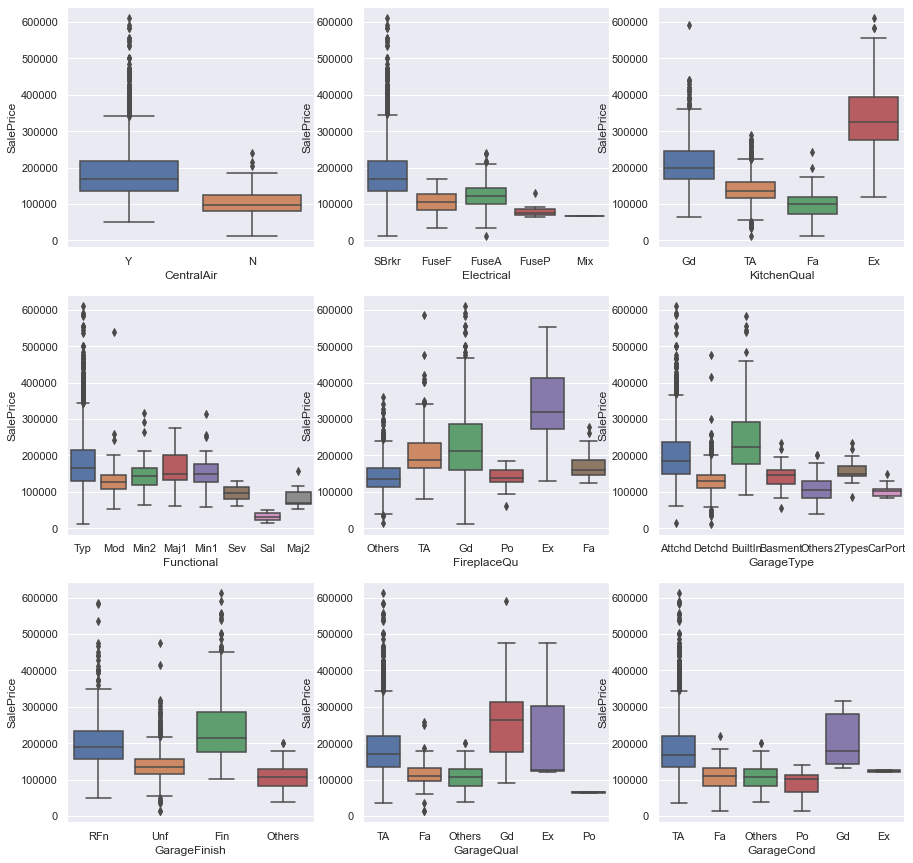

In [191]:
sns.set()
#define plotting region (2 rows, 2 columns)
fig, axes = plt.subplots(3, 3, figsize=(15,15))
#cat_train = house_train[cat_features]
#create boxplot in each subplot
sns.boxplot(data=cat_train, x=cat_train.columns[27], y='SalePrice', ax=axes[0,0])
sns.boxplot(data=cat_train, x=cat_train.columns[28], y='SalePrice', ax=axes[0,1])
sns.boxplot(data=cat_train, x=cat_train.columns[29], y='SalePrice', ax=axes[0,2])
sns.boxplot(data=cat_train, x=cat_train.columns[30], y='SalePrice', ax=axes[1,0])
sns.boxplot(data=cat_train, x=cat_train.columns[31], y='SalePrice', ax=axes[1,1])
sns.boxplot(data=cat_train, x=cat_train.columns[32], y='SalePrice', ax=axes[1,2])
sns.boxplot(data=cat_train, x=cat_train.columns[33], y='SalePrice', ax=axes[2,0])
sns.boxplot(data=cat_train, x=cat_train.columns[34], y='SalePrice', ax=axes[2,1])
sns.boxplot(data=cat_train, x=cat_train.columns[35], y='SalePrice', ax=axes[2,2])
plt.show()

**Observation:**
Likewise, I can already see some of the columns will show up with clear correlation with sale price and hence to make sure it must be included within the model.  These attributes are 'FireplaceQu', 'GarageFinish', 'CentralAir' and 'KitchenQual'.

### Perform encoding & correlation check
**Note:** Check against the data dictionary again and for all ordinal column, need to explicitly convert them.  I want to mode to be able to "learn" the rank-order behaviour and hence converting, for example, 5 to Excellent and etc.  As for the rest which are nominal column, shall leverage on LabelEncoder to convert.

In [439]:
# Basement Condition
house_train.BsmtCond.replace({'Others':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)
# Basement Exposure
house_train.BsmtExposure.replace({'Others':0, 'No':1, 'Mn':2, 'Av':3, 'Gd':4}, inplace=True)
# Finished Basement 1 Rating
house_train.BsmtFinType1.replace({'Others':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}, inplace=True)
# Finished Basement 2 Rating
house_train.BsmtFinType2.replace({'Others':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}, inplace=True)
# Basement Quality
house_train.BsmtQual.replace({'Others':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)
# Electrical
house_train.Electrical.replace({'Mix':0, 'FuseP':1, 'FuseF':2, 'FuseA':3, 'SBrkr':4}, inplace=True)
# Exterior Condition
house_train.ExterCond.replace({'Others':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)
# Exterior Quality
house_train.ExterQual.replace({'Others':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)
# Home functionality
house_train.Functional.replace({'Others':0, 'Sal':1, 'Sev':2, 'Maj2':3, 'Maj1':4, 'Mod':5, 'Min2':6, 'Min1':7, 'Typ':8}, inplace=True)
# Garage Quality
house_train.GarageQual.replace({'Others':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)
# Garage Condition
house_train.GarageCond.replace({'Others':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)
# Garage Finish
house_train.GarageFinish.replace({'Others':0, 'Unf':1, 'RFn':2, 'Fin':3}, inplace=True)
# Heating Quality and Condition
house_train.HeatingQC.replace({'Others':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)
# Kitchen Quality
house_train.KitchenQual.replace({'Others':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)
# Land Slope
house_train.LandSlope.replace({'Others':0, 'Sev':1, 'Mod':2, 'Gtl':3}, inplace=True)
# Lot Shape
house_train.LotShape.replace({'Others':0, 'Reg':1, 'IR1':2, 'IR2':3, 'IR3':4}, inplace=True)
# Paved Driveway
house_train.PavedDrive.replace({'Others':0, 'N':1, 'P':2, 'Y':3}, inplace=True)
# Utilities
house_train.Utilities.replace({'Others':0, 'ELO':1, 'NoSeWa':2, 'NoSewr':3, 'AllPub':4}, inplace=True)
# Fireplace Quality
house_train.FireplaceQu.replace({'Others':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

Separate the ordinal and nominal features and I want to only dummify the nominal features subsequently.  As ordinal features has the "ordering effect" and wanted the regression model to capture that relationship with sale price.  

In [440]:
ord_features = ['BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'Electrical', 'ExterCond', 'ExterQual', 'Functional', 'GarageQual', 'GarageCond', 'GarageFinish', 'HeatingQC', 'KitchenQual', 'LandSlope', 'LotShape', 'PavedDrive', 'Utilities', 'FireplaceQu']

In [441]:
#these are non-ordinal features
nor_features = house_train.select_dtypes(include=['object']).columns
nor_features

Index(['MSZoning', 'Street', 'LandContour', 'LotConfig', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
       'Heating', 'CentralAir', 'GarageType', 'SaleType'],
      dtype='object')

In [442]:
#for nominal features, we can use Label Encoder as it does not contain "ordinal" information
le = LabelEncoder()
for x in nor_features:
    house_train[x] = le.fit_transform(house_train[x])

Check again to make sure all 'object' datatype has been converted into numerical.

In [443]:
house_train.select_dtypes(include=['object']).columns

Index([], dtype='object')

In [444]:
house_train.head()

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
0  109          60         5         70.0    13517       1         2   
1  544          60         5         43.0    11492       1         2   
2  153          20         5         68.0     7922       1         1   
3  318          60         5         73.0     9802       1         1   
4  255          50         5         82.0    14235       1         2   

   LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0            3          4          1          3            20           5   
1            3          4          1          3            21           2   
2            3          4          4          3            13           2   
3            3          4          4          3            24           2   
4            3          4          4          3            21           2   

   Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0           2         0           5            6            8       1976   
1           2         0           5            7            5       1996   
2           2         0           2            5            7       1953   
3           2         0           5            5            5       2006   
4           2         0           0            6            8       1900   

   YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
0          2005          1         0            6            9           1   
1          1997          1         0           12           12           1   
2          2007          1         0           12           12           2   
3          2007          1         0           12           12           2   
4          1993          1         0           13            9           2   

   MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
0       289.0          4          3           1         3         3   
1       132.0          4          3           2         4         3   
2         0.0          3          4           1         3         3   
3         0.0          3          3           2         4         3   
4         0.0          3          3           2         2         4   

   BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0             1             6       533.0             1         0.0   
1             1             6       637.0             1         0.0   
2             1             6       731.0             1         0.0   
3             1             1         0.0             1         0.0   
4             1             1         0.0             1         0.0   

   BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  \
0      192.0        725.0        0          5           1           4   
1      276.0        913.0        0          5           1           4   
2      326.0       1057.0        0          3           1           4   
3      384.0        384.0        0          4           1           4   
4      676.0        676.0        0          3           1           4   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       725       754             0       1479           0.0           0.0   
1       913      1209             0       2122           1.0           0.0   
2      1057         0             0       1057           1.0           0.0   
3       744       700             0       1444           0.0           0.0   
4       831       614             0       1445           0.0           0.0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0         2         1             3             1            4             6   
1         2         1             4             1            4             8   
2         1         0             3             1            4             5   
3         2         1             3             1            3             7   
4         2         

Here we repeat the same correlation matrix process as before to further short list the features.

In [445]:
#repeat the correlation analysis against categorical features
cat_features_list = cat_features.tolist()
cat_features_list.append('SalePrice')

In [446]:
pd.set_option('display.max_columns', 500)
cat_house_train = house_train[cat_features_list]

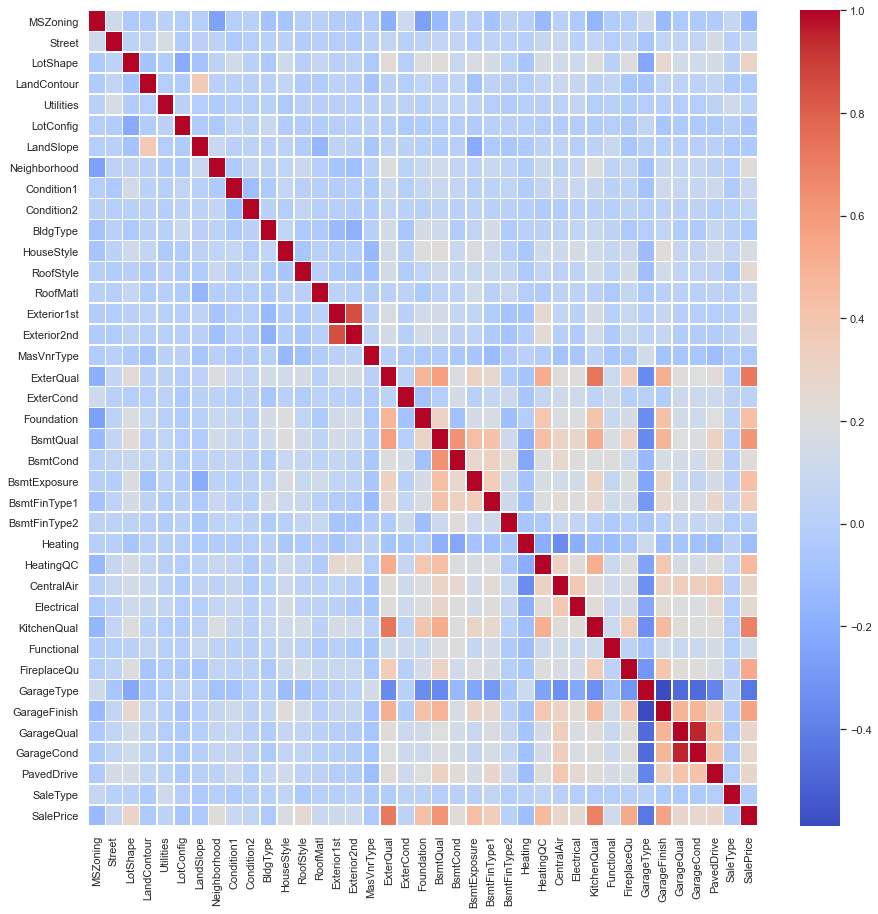

In [447]:
plt.figure(figsize=(15, 15))
corr_matrix = cat_house_train.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', linewidths=.5, xticklabels=True, yticklabels=True)
plt.show()

In [448]:
#capture the list of columns that we want to keep and drop based on the correlation
featureToDrop = []
featureToKeep = []
#couldn't find a method that returns that, so custom develope
for i in range(len(corr_matrix)):
    if corr_matrix.index[i] == 'SalePrice':
        pointer = i
for j in range(len(corr_matrix)):
    corr = abs(corr_matrix.iloc[pointer, j])
    if (corr >= 0.5):
        if (corr_matrix.index[j] != 'SalePrice'):
            featureToKeep.append(corr_matrix.index[j])
    else:
            featureToDrop.append(corr_matrix.index[j])
#remember to drop SalePrice from the feature to keep array
featureToKeep 

['ExterQual', 'BsmtQual', 'KitchenQual', 'FireplaceQu', 'GarageFinish']

In [449]:
featureToDrop

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterCond',
 'Foundation',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'Functional',
 'GarageType',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType']

In [450]:
#avoid mulitcolinearity
featuresCorrelatedCol = []
featuresCorrelatedRow = []
featureToDrop = []
featureNotDrop = []
for i in range(len(corr_matrix)):
    if corr_matrix.columns[i] != 'SalePrice':
        column_feature = corr_matrix.columns[i]
        for j in range(len(corr_matrix)):
            corr = abs(corr_matrix.iloc[i][j])
            if (corr >= 0.75):
                if (column_feature != corr_matrix.index[j] and corr_matrix.index[j] != 'SalePrice'):
                    featuresCorrelatedCol.append(column_feature)
                    featuresCorrelatedRow.append(corr_matrix.index[j])
cor_table = {
    'Features 1' : featuresCorrelatedCol,
    'Features 2' : featuresCorrelatedRow,
}
# creating a Dataframe object 
df = pd.DataFrame(cor_table)
df

Features 1   Features 2
0  Exterior1st  Exterior2nd
1  Exterior2nd  Exterior1st
2   GarageQual   GarageCond
3   GarageCond   GarageQual

In [451]:
#retrieve the correlation of the above features with 'SalePrice' to decide on which have a stronger relationship and shall keep that
selected_features = []
i = 0
while i < len(featuresCorrelatedCol)/2:
    counter = i*2
    corr_1 = corr_matrix.at['SalePrice', featuresCorrelatedCol[counter]]
    corr_2 = corr_matrix.at['SalePrice', featuresCorrelatedCol[counter+1]]
    if (corr_1 > corr_2):
        selected_features.append(featuresCorrelatedCol[counter])
    else:
        selected_features.append(featuresCorrelatedCol[counter+1])
    i += 1
selected_features 

['Exterior2nd', 'GarageQual']

In [452]:
print(f" Correlation between Exterior2nd & SalePrice: {corr_matrix.at['SalePrice', 'Exterior2nd']}")
print(f" Correlation between GarageQual & SalePrice: {corr_matrix.at['SalePrice', 'GarageQual']}")

 Correlation between Exterior2nd & SalePrice: 0.11254746983754475
 Correlation between GarageQual & SalePrice: 0.2824055290273999


['ExterQual', 'BsmtQual', 'KitchenQual', 'FireplaceQu', 'GarageFinish']

In [453]:
nor_features

Index(['MSZoning', 'Street', 'LandContour', 'LotConfig', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
       'Heating', 'CentralAir', 'GarageType', 'SaleType'],
      dtype='object')

Here, I will add all nominal column directly into the considered features list to train the model.

In [454]:
features_for_model.extend(featureToKeep)
nor_features_list = nor_features.tolist()
features_for_model.extend(nor_features_list)
features_for_model

['LotFrontage',
 'LotArea',
 'OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'TotalBsmtSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'Fireplaces',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'ExterQual',
 'BsmtQual',
 'KitchenQual',
 'FireplaceQu',
 'GarageFinish',
 'MSZoning',
 'Street',
 'LandContour',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'Foundation',
 'Heating',
 'CentralAir',
 'GarageType',
 'SaleType']

### Simple Feature Engineering
Derive some new features, mainly based on contextual understanding (and some common sense) rather than relying on feature engineering API such as PolynomialFeatures since the end model has to be interpretable and not just purely focusing on performance.  I am sure there are alot more that can be derived than the list below but due to time constraint and also a lack of contextual understanding of US property market (that is where the dataset came from), I have settled with this list below for the purpose of project submission.

For time related, I am sure for example, the age of the house would have some impact to the sale price.

In [455]:
#Add new features
house_train['Age'] = house_train['YrSold'] - house_train['YearBuilt']
house_train['RemodAge'] = abs(house_train['YrSold'] - house_train['YearRemodAdd'])
#with these 2 features created, I will remove 'YearBuilt' and 'YearRemoAdd' 

<AxesSubplot:xlabel='Age', ylabel='SalePrice'>

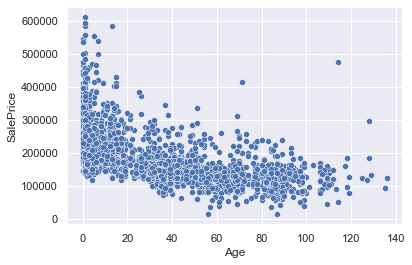

In [456]:
sns.scatterplot(data = house_train, x = "Age", y = "SalePrice")

This confirms that age of the house has a linear relationship with the sale price, the older the house, the less money it commands with few outlier.

<AxesSubplot:xlabel='RemodAge', ylabel='SalePrice'>

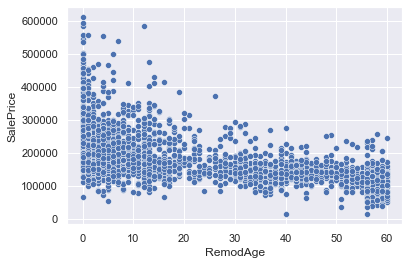

In [457]:
sns.scatterplot(data = house_train, x = "RemodAge", y = "SalePrice")

Likewise for remodel date.  The closer it is to the selling date, the newer the furnishing, the higher price it can command.  This make sense

With some common sense and verification from the scatterplot and boxplot, I conclude deriving binary features (for example, presence of pool or not does have a bearing to the sale price) for the below.

In [458]:
house_train['WithBasement'] = house_train.TotalBsmtSF.apply(lambda x: 1 if x > 0 else 0)
house_train['WithGarage'] = house_train.GarageArea.apply(lambda x: 1 if x > 0 else 0)
house_train['WithPorch'] = house_train.OpenPorchSF.apply(lambda x: 1 if x > 0 else 0)
house_train['WithPool'] = house_train.PoolArea.apply(lambda x: 1 if x > 0 else 0)

<AxesSubplot:xlabel='WithBasement', ylabel='SalePrice'>

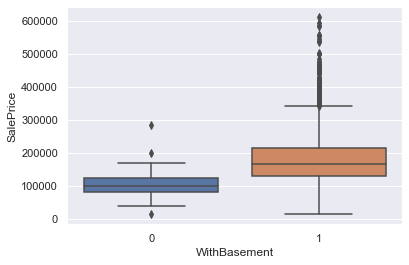

In [459]:
sns.boxplot(data = house_train, x = "WithBasement", y = "SalePrice")

The median price obviously is higher for unit with basement.

<AxesSubplot:xlabel='WithGarage', ylabel='SalePrice'>

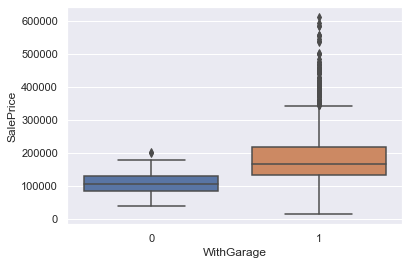

In [460]:
sns.boxplot(data = house_train, x = "WithGarage", y = "SalePrice")

Likewise for garage case.

<AxesSubplot:xlabel='WithPorch', ylabel='SalePrice'>

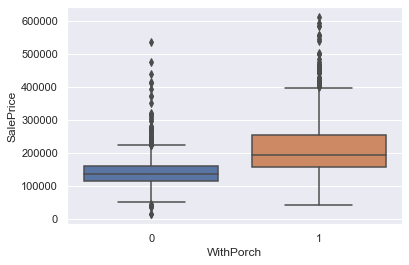

In [461]:
sns.boxplot(data = house_train, x = "WithPorch", y = "SalePrice")

Likewise for unit with porch, which will command higher price.

<AxesSubplot:xlabel='WithPool', ylabel='SalePrice'>

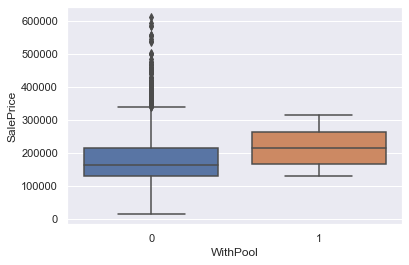

In [462]:
sns.boxplot(data = house_train, x = "WithPool", y = "SalePrice")

Similarly for this case

In [463]:
new_features_cat = ['WithBasement', 'WithGarage', 'WithPorch', 'WithPool']

In [464]:
#Add these derived features to features_for_model later
features_for_model.append('Age')
features_for_model.append('RemodAge')
features_for_model.append('WithBasement')
features_for_model.append('WithGarage')
features_for_model.append('WithPorch')
features_for_model.append('WithPool')

In [465]:
features_for_model

['LotFrontage',
 'LotArea',
 'OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'TotalBsmtSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'Fireplaces',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'ExterQual',
 'BsmtQual',
 'KitchenQual',
 'FireplaceQu',
 'GarageFinish',
 'MSZoning',
 'Street',
 'LandContour',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'Foundation',
 'Heating',
 'CentralAir',
 'GarageType',
 'SaleType',
 'Age',
 'RemodAge',
 'WithBasement',
 'WithGarage',
 'WithPorch',
 'WithPool']

In [466]:
#remove year related columns
features_for_model.remove('YearBuilt')
features_for_model.remove('YearRemodAdd')

Just to remind myself I have touched on these rubic in the above section..

**Preprocessing and Modeling**

- <span style="background-color: #0dff00">Are categorical variables one-hot encoded?</span>
- <span style="background-color: #0dff00">Does the student investigate or manufacture features with linear relationships to the target?</span>
- <span style="background-color: #0dff00">Does the student utilize feature selection to remove noisy or multi-collinear features?</span>

# Model Preparation

These part of the rubic would be covered below.

**Preprocessing and Modeling**

- <span style="background-color: #0dff00">Have the data been scaled appropriately?</span>
- <span style="background-color: #0dff00">Does the student properly split and/or sample the data for validation/training purposes?</span>
- <span style="background-color: #0dff00">Does the student test and evaluate a variety of models to identify a production algorithm (**AT MINIMUM:** linear regression, lasso, and ridge)?</span>
- <span style="background-color: #0dff00">Does the student defend their choice of production model relevant to the data at hand and the problem?</span>
- <span style="background-color: #0dff00">Does the student explain how the model works and evaluate its performance successes/downfalls?</span>

Finalize the features for the model here:

In [467]:
#num_features.extend(nor_features)
#combine_features = num_features + nor_features
#combine SalePrice into it
features_for_model.append('SalePrice')
data_for_linear = house_train[features_for_model]
data_for_linear.head()

LotFrontage  LotArea  OverallQual  MasVnrArea  BsmtFinSF1  TotalBsmtSF  \
0         70.0    13517            6       289.0       533.0        725.0   
1         43.0    11492            7       132.0       637.0        913.0   
2         68.0     7922            5         0.0       731.0       1057.0   
3         73.0     9802            5         0.0         0.0        384.0   
4         82.0    14235            6         0.0         0.0        676.0   

   2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  HalfBath  Fireplaces  \
0       754       1479           0.0         2         1           0   
1      1209       2122           1.0         2         1           1   
2         0       1057           1.0         1         0           0   
3       700       1444           0.0         2         1           0   
4       614       1445           0.0         2         0           0   

   GarageYrBlt  GarageArea  WoodDeckSF  OpenPorchSF  ExterQual  BsmtQual  \
0       1976.0       475.0           0           44          4         3   
1       1997.0       559.0           0           74          4         4   
2       1953.0       246.0           0           52          3         3   
3       2007.0       400.0         100            0          3         4   
4       1957.0       484.0           0           59          3         2   

   KitchenQual  FireplaceQu  GarageFinish  MSZoning  Street  LandContour  \
0            4            0             2         5       1            3   
1            4            3             2         5       1            3   
2            4            0             1         5       1            3   
3            3            0             3         5       1            3   
4            3            0             1         5       1            3   

   LotConfig  Neighborhood  Condition1  Condition2  BldgType  HouseStyle  \
0          1            20           5           2         0           5   
1          1            21           2           2         0           5   
2          4            13           2           2         0           2   
3          4            24           2           2         0           5   
4          4            21           2           2         0           0   

   RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  Foundation  \
0          1         0            6            9           1           1   
1          1         0           12           12           1           2   
2          1         0           12           12           2           1   
3          1         0           12           12           2           2   
4          1         0           13            9           2           2   

   Heating  CentralAir  GarageType  SaleType  Age  RemodAge  WithBasement  \
0        0           1           1         8   34         5             1   
1        0           1           1         8   13        12             1   
2        0           1           5         8   57         3             1   
3        0           1           3         8    4         3             1   
4        0           1           5         8  110        17             1   

   WithGarage  WithPorch  WithPool  SalePrice  
0           1          1         0     130500  
1           1          1         0     220000  
2           1          1         0     109000  
3           1          0         0     174000  
4           1          1         0     138500

Dummify the nominal features as explained in previous section:

In [468]:
data_for_linear = pd.get_dummies(data_for_linear, columns=nor_features)
data_for_linear = pd.get_dummies(data_for_linear, columns=new_features_cat)
data_for_linear.head()

LotFrontage  LotArea  OverallQual  MasVnrArea  BsmtFinSF1  TotalBsmtSF  \
0         70.0    13517            6       289.0       533.0        725.0   
1         43.0    11492            7       132.0       637.0        913.0   
2         68.0     7922            5         0.0       731.0       1057.0   
3         73.0     9802            5         0.0         0.0        384.0   
4         82.0    14235            6         0.0         0.0        676.0   

   2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  HalfBath  Fireplaces  \
0       754       1479           0.0         2         1           0   
1      1209       2122           1.0         2         1           1   
2         0       1057           1.0         1         0           0   
3       700       1444           0.0         2         1           0   
4       614       1445           0.0         2         0           0   

   GarageYrBlt  GarageArea  WoodDeckSF  OpenPorchSF  ExterQual  BsmtQual  \
0       1976.0       475.0           0           44          4         3   
1       1997.0       559.0           0           74          4         4   
2       1953.0       246.0           0           52          3         3   
3       2007.0       400.0         100            0          3         4   
4       1957.0       484.0           0           59          3         2   

   KitchenQual  FireplaceQu  GarageFinish  Age  RemodAge  SalePrice  \
0            4            0             2   34         5     130500   
1            4            3             2   13        12     220000   
2            4            0             1   57         3     109000   
3            3            0             3    4         3     174000   
4            3            0             1  110        17     138500   

   MSZoning_0  MSZoning_1  MSZoning_2  MSZoning_3  MSZoning_4  MSZoning_5  \
0           0           0           0           0           0           1   
1           0           0           0           0           0           1   
2           0           0           0           0           0           1   
3           0           0           0           0           0           1   
4           0           0           0           0           0           1   

   MSZoning_6  Street_0  Street_1  LandContour_0  LandContour_1  \
0           0         0         1              0              0   
1           0         0         1              0              0   
2           0         0         1              0              0   
3           0         0         1              0              0   
4           0         0         1              0              0   

   LandContour_2  LandContour_3  LotConfig_0  LotConfig_1  LotConfig_2  \
0              0              1            0            1            0   
1              0              1            0            1            0   
2              0              1            0            0            0   
3              0              1            0            0            0   
4              0              1            0            0            0   

   LotConfig_3  LotConfig_4  Neighborhood_0  Neighborhood_1  Neighborhood_2  \
0            0            0               0               0               0   
1            0            0               0               0               0   
2            0            1               0               0               0   
3            0            1               0               0               0   
4            0            1               0               0               0   

   Neighborhood_3  Neighborhood_4  Neighborhood_5  Neighborhood_6  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   Neighborhood_7  Nei

In [469]:
#first try out Lasso by using only the numerical predictors
data_for_model = data_for_linear

In [470]:
data_for_model.head()

LotFrontage  LotArea  OverallQual  MasVnrArea  BsmtFinSF1  TotalBsmtSF  \
0         70.0    13517            6       289.0       533.0        725.0   
1         43.0    11492            7       132.0       637.0        913.0   
2         68.0     7922            5         0.0       731.0       1057.0   
3         73.0     9802            5         0.0         0.0        384.0   
4         82.0    14235            6         0.0         0.0        676.0   

   2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  HalfBath  Fireplaces  \
0       754       1479           0.0         2         1           0   
1      1209       2122           1.0         2         1           1   
2         0       1057           1.0         1         0           0   
3       700       1444           0.0         2         1           0   
4       614       1445           0.0         2         0           0   

   GarageYrBlt  GarageArea  WoodDeckSF  OpenPorchSF  ExterQual  BsmtQual  \
0       1976.0       475.0           0           44          4         3   
1       1997.0       559.0           0           74          4         4   
2       1953.0       246.0           0           52          3         3   
3       2007.0       400.0         100            0          3         4   
4       1957.0       484.0           0           59          3         2   

   KitchenQual  FireplaceQu  GarageFinish  Age  RemodAge  SalePrice  \
0            4            0             2   34         5     130500   
1            4            3             2   13        12     220000   
2            4            0             1   57         3     109000   
3            3            0             3    4         3     174000   
4            3            0             1  110        17     138500   

   MSZoning_0  MSZoning_1  MSZoning_2  MSZoning_3  MSZoning_4  MSZoning_5  \
0           0           0           0           0           0           1   
1           0           0           0           0           0           1   
2           0           0           0           0           0           1   
3           0           0           0           0           0           1   
4           0           0           0           0           0           1   

   MSZoning_6  Street_0  Street_1  LandContour_0  LandContour_1  \
0           0         0         1              0              0   
1           0         0         1              0              0   
2           0         0         1              0              0   
3           0         0         1              0              0   
4           0         0         1              0              0   

   LandContour_2  LandContour_3  LotConfig_0  LotConfig_1  LotConfig_2  \
0              0              1            0            1            0   
1              0              1            0            1            0   
2              0              1            0            0            0   
3              0              1            0            0            0   
4              0              1            0            0            0   

   LotConfig_3  LotConfig_4  Neighborhood_0  Neighborhood_1  Neighborhood_2  \
0            0            0               0               0               0   
1            0            0               0               0               0   
2            0            1               0               0               0   
3            0            1               0               0               0   
4            0            1               0               0               0   

   Neighborhood_3  Neighborhood_4  Neighborhood_5  Neighborhood_6  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   Neighborhood_7  Nei

In [471]:
data_for_model.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'MasVnrArea', 'BsmtFinSF1',
       'TotalBsmtSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       ...
       'SaleType_7', 'SaleType_8', 'WithBasement_0', 'WithBasement_1',
       'WithGarage_0', 'WithGarage_1', 'WithPorch_0', 'WithPorch_1',
       'WithPool_0', 'WithPool_1'],
      dtype='object', length=180)

Preparing the target (SalePrice) and dependent features for the model:

In [472]:
X = data_for_model.drop('SalePrice', axis=1)
#y = data_for_model['SalePrice']
#log transform SalePrice here
y = np.log1p(data_for_model['SalePrice'])

In [473]:
X.head()

LotFrontage  LotArea  OverallQual  MasVnrArea  BsmtFinSF1  TotalBsmtSF  \
0         70.0    13517            6       289.0       533.0        725.0   
1         43.0    11492            7       132.0       637.0        913.0   
2         68.0     7922            5         0.0       731.0       1057.0   
3         73.0     9802            5         0.0         0.0        384.0   
4         82.0    14235            6         0.0         0.0        676.0   

   2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  HalfBath  Fireplaces  \
0       754       1479           0.0         2         1           0   
1      1209       2122           1.0         2         1           1   
2         0       1057           1.0         1         0           0   
3       700       1444           0.0         2         1           0   
4       614       1445           0.0         2         0           0   

   GarageYrBlt  GarageArea  WoodDeckSF  OpenPorchSF  ExterQual  BsmtQual  \
0       1976.0       475.0           0           44          4         3   
1       1997.0       559.0           0           74          4         4   
2       1953.0       246.0           0           52          3         3   
3       2007.0       400.0         100            0          3         4   
4       1957.0       484.0           0           59          3         2   

   KitchenQual  FireplaceQu  GarageFinish  Age  RemodAge  MSZoning_0  \
0            4            0             2   34         5           0   
1            4            3             2   13        12           0   
2            4            0             1   57         3           0   
3            3            0             3    4         3           0   
4            3            0             1  110        17           0   

   MSZoning_1  MSZoning_2  MSZoning_3  MSZoning_4  MSZoning_5  MSZoning_6  \
0           0           0           0           0           1           0   
1           0           0           0           0           1           0   
2           0           0           0           0           1           0   
3           0           0           0           0           1           0   
4           0           0           0           0           1           0   

   Street_0  Street_1  LandContour_0  LandContour_1  LandContour_2  \
0         0         1              0              0              0   
1         0         1              0              0              0   
2         0         1              0              0              0   
3         0         1              0              0              0   
4         0         1              0              0              0   

   LandContour_3  LotConfig_0  LotConfig_1  LotConfig_2  LotConfig_3  \
0              1            0            1            0            0   
1              1            0            1            0            0   
2              1            0            0            0            0   
3              1            0            0            0            0   
4              1            0            0            0            0   

   LotConfig_4  Neighborhood_0  Neighborhood_1  Neighborhood_2  \
0            0               0               0               0   
1            0               0               0               0   
2            1               0               0               0   
3            1               0               0               0   
4            1               0               0               0   

   Neighborhood_3  Neighborhood_4  Neighborhood_5  Neighborhood_6  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   Neighborhood_7  Neighborhood_8  Neighborhood_9  Neighborhood_10  \
0               0 

Since we're using `Lasso` and `Ridge`, we'll want to scale our features:

In [474]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)
sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)

### Instantiate All 3 Regression Method & Training

For this project, I will be using R^2 and RMSE to evaluate the 3 different regression method namely Linear Regression, Ridge and Lasso.  I will also use the simple mean as baseline model for benchmarking.

#### Linear Regression:

In [475]:
#Baseline model
#print(f'RMSE of baseline model: {np.sqrt(metrics.mean_squared_error(np.exp(y_test), [] * len(y_test))}')
y_test_back = np.exp(y_test)
y_train_back = np.exp(y_train)
print(f'R^2 of baseline model: {r2_score(y_test, [np.mean(y_train)] * len(y_test))}')
print(f'RMSE of baseline model: {np.sqrt(metrics.mean_squared_error(y_test_back, [np.mean(y_train_back)] * len(y_test_back)))}')
#np.sqrt(metrics.mean_squared_error(np.exp(y_test), np.exp(y_pred)))

R^2 of baseline model: -0.01153941337998643
RMSE of baseline model: 77857.63467216013


It can be observed that with a simplistic base model using average, it does give quite a bad R^2.  Let move on to see what Linear regression, Ridge and Lasso can give us separately.

Instantiate the respective models:

In [492]:
#instantiate all 3 regression method
lr = LinearRegression()

Evaluates a score by cross-validation and number of folds is given in cv (using default=5):

In [493]:
lr.fit(X_train, y_train)
lr_scores = cross_val_score(lr, X_train, y_train, cv=5)

print(lr_scores) # to show r^2 from each of the 3 fold validations
lr_scores.mean() # to average r^2 from across cv evaluations

[0.89714811 0.90010452 0.87811867 0.8786651  0.89446227]


0.8896997318720304

In [494]:
#testing with linear regression
y_pred = lr.predict(X_test) # making predictions on testing set
r2 = r2_score(y_test, y_pred) # comparing model predictions vs true observations
X_rmse = np.sqrt(metrics.mean_squared_error(np.exp(y_test), np.exp(y_pred)))
print(f'R^2 of linear regression: {r2}')
print(f'RMSE of linear regression: {X_rmse}')

R^2 of linear regression: 0.8716543286276356
RMSE of linear regression: 22682.01320329063


Even with basic linear regression, we can achieve much higher R^2 and lower RMSE as compared with the base model.

#### Ridge:

Trying to find the optimal alpha for Ridge:

In [495]:
%%time
ridge_alphas = np.logspace(0, 5, 200)

optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=5)
optimal_ridge.fit(Z_train, y_train)

print (optimal_ridge.alpha_)

102.34114021054538
Wall time: 1.9 s


In [496]:
ridge = Ridge(alpha=optimal_ridge.alpha_)
ridge_scores = cross_val_score(ridge, Z_train, y_train, cv=5)
ridge_scores.mean()

0.903883320242486

In [497]:
#testing with Ridge
y_pred = optimal_ridge.predict(Z_test) # making predictions on testing set
r2 = r2_score(y_test, y_pred) # comparing model predictions vs true observations
#compute RMSE
X_rmse = np.sqrt(metrics.mean_squared_error(np.exp(y_test), np.exp(y_pred)))

print(f'R^2 of Ridge regression: {r2}')
print(f'RMSE of Ridge regression: {X_rmse}')

R^2 of Ridge regression: 0.8721772185492753
RMSE of Ridge regression: 22306.30831389333


For both R^2 and RMSE, we can see that Ridge performs better as compared to linear regression.  Let see what Lasso gives us.  Similar approach to Ridge, proceed with finding the optimal alpha for Lasso firstly.

In [498]:
optimal_lasso = LassoCV(n_alphas=500, cv=10, verbose=1)
optimal_lasso.fit(Z_train, y_train)

print (optimal_lasso.alpha_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
.......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

0.004466233445007024


..................................................................................................................................................................................................................................................[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.9s finished


In [499]:
lasso = Lasso(alpha=optimal_lasso.alpha_)

lasso_scores = cross_val_score(lasso, Z_train, y_train, cv=5)

print (lasso_scores)
print (lasso_scores.mean())

[0.93904681 0.92358906 0.88975894 0.91248208 0.90836215]
0.914647807636797


In [500]:
l_alphas = np.logspace(-3, 0, 100)

# Cross-validate over our list of Lasso alphas.
lasso_cv = LassoCV(alphas=l_alphas, cv=5, max_iter=50000).fit(Z_train, y_train)
print(lasso_cv.score(Z_train, y_train))
print(lasso_cv.score(Z_test, y_test))

0.9372185956052
0.8802068509429608


In [506]:
y_pred = optimal_lasso.predict(Z_test) # making predictions on testing set
r2 = r2_score(y_test, y_pred) # comparing model predictions vs true observations
X_rmse = np.sqrt(metrics.mean_squared_error(np.exp(y_test), np.exp(y_pred)))
print(f'R^2 of Lasso regression: {r2}')
print(f'RMSE of Lasso regression: {X_rmse}')

R^2 of Lasso regression: 0.8802586749267822
RMSE of Lasso regression: 20901.451276741733


**Note:** Comparing against linear regression and Ridge, Lasso performs better with a higher R^2 and lower RMSE.  Next, let plot the actual sale price and predicted price to take a look and also the residual view.

Text(0.5, 1.0, 'Lasso Predictions of Sale Price vs Actual Sale Price')

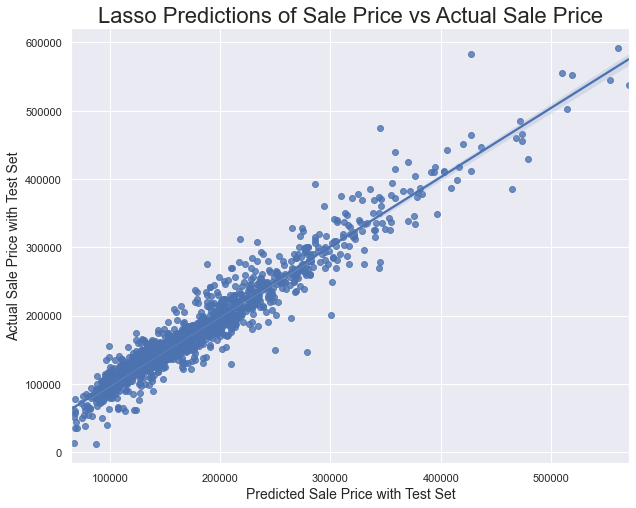

In [502]:
plt.figure(figsize=(10,8))
sns.set_theme(color_codes=True)
sns.regplot(data=Z_train, x=np.exp(y_pred), y=np.exp(y_test))
plt.xlabel('Predicted Sale Price with Test Set', fontsize=14)
plt.ylabel('Actual Sale Price with Test Set', fontsize=14)
plt.title('Lasso Predictions of Sale Price vs Actual Sale Price', fontsize=22)

Quite happy with how the model performed in terms of predicted price versus actual price. We can see that the line of best fit passes through most of the points, except for a couple of outliers in the extreme sale price range and somewhere in between.

**Next plotting the residual:**

C:\Users\weeho\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Residual')

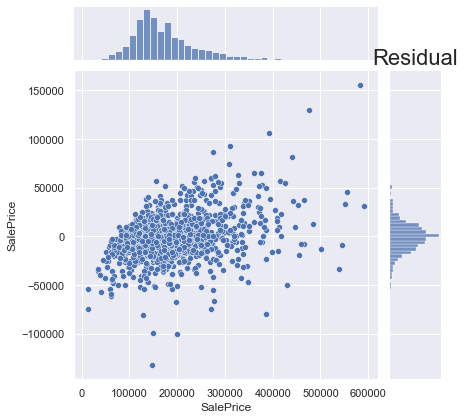

In [503]:
sns.jointplot(np.exp(y_test), np.exp(y_test)-np.exp(y_pred))
plt.xlabel('Predicted Sale Price', fontsize=14)
plt.ylabel('Actual Sale Price', fontsize=14)
plt.title('Residual', fontsize=22)

The residuals looks random and has normal distribution, which supports the multiple linear regression assumption of homoscedasticity.

In [504]:
features = [col for col in data_for_model._get_numeric_data().columns if col != 'SalePrice']
features

['LotFrontage',
 'LotArea',
 'OverallQual',
 'MasVnrArea',
 'BsmtFinSF1',
 'TotalBsmtSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'Fireplaces',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'ExterQual',
 'BsmtQual',
 'KitchenQual',
 'FireplaceQu',
 'GarageFinish',
 'Age',
 'RemodAge',
 'MSZoning_0',
 'MSZoning_1',
 'MSZoning_2',
 'MSZoning_3',
 'MSZoning_4',
 'MSZoning_5',
 'MSZoning_6',
 'Street_0',
 'Street_1',
 'LandContour_0',
 'LandContour_1',
 'LandContour_2',
 'LandContour_3',
 'LotConfig_0',
 'LotConfig_1',
 'LotConfig_2',
 'LotConfig_3',
 'LotConfig_4',
 'Neighborhood_0',
 'Neighborhood_1',
 'Neighborhood_2',
 'Neighborhood_3',
 'Neighborhood_4',
 'Neighborhood_5',
 'Neighborhood_6',
 'Neighborhood_7',
 'Neighborhood_8',
 'Neighborhood_9',
 'Neighborhood_10',
 'Neighborhood_11',
 'Neighborhood_12',
 'Neighborhood_13',
 'Neighborhood_14',
 'Neighborhood_15',
 'Neighborhood_16',
 'Neighborhood_17',
 'Neighborhood_18',
 'Neighborhoo

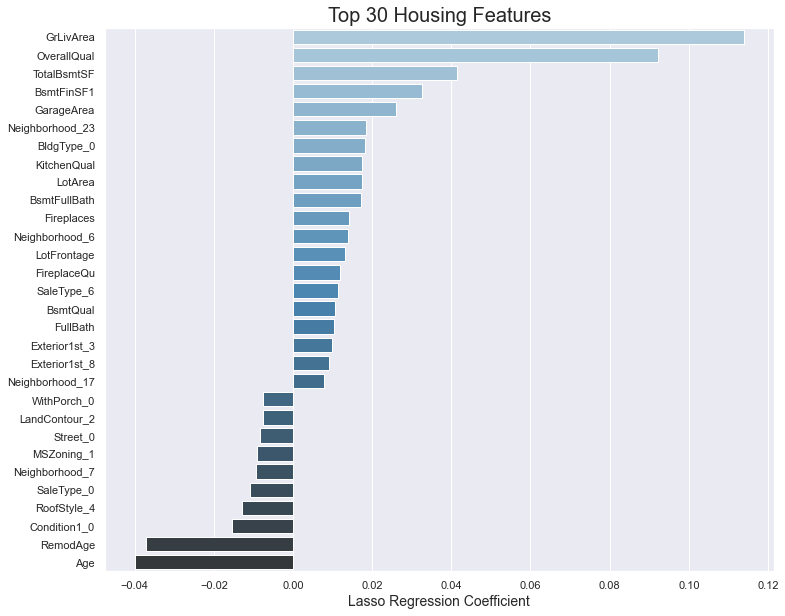

In [505]:
lasso_df = pd.DataFrame(columns=['Feature', 'Coef', 'Abs Coef'])
lasso_df['Abs Coef'] = abs(optimal_lasso.coef_)
lasso_df['Coef'] = optimal_lasso.coef_
lasso_df['Feature'] = features

# Plot top 30 features (sorted by absolute regression coefficient)
plt.figure(figsize=(12,10))
data = lasso_df.sort_values(by='Abs Coef', ascending=False).head(30)[['Feature', 'Coef']] \
               .sort_values(by='Coef', ascending=False).reset_index(drop=True)
    
ax = sns.barplot(data=data, y='Feature', x='Coef', orient='h', palette='Blues_d')
ax.set_ylabel('')
ax.set_yticklabels(data['Feature'], size=11)
ax.set_xlabel('Lasso Regression Coefficient', fontsize=14)
plt.title('Top 30 Housing Features', fontsize=20);

# Conclusion & Recommendation

### Conclusion:
Seeing the rank order on the importance of the features, we can see that our model is interpretable and make economic sense. Our top features are living area (GrLivArea), overall quality (OverallQual), basement related (both TotalBsmtSF and BsmtFinSF1), Garage dependent (GarageArea) and includes features like age and the quality of the exterior, kitchen, fireplace, bigger lot area. Quite of number of neighborhoods like Northridge Heights and Stone Brook also come up as strong positive predictors which again emphasize the fact that "Location is King".  
I am also happy to see that some of the features I have engineered like both Age and RemodAge has make it into the top coefficient list.  As they are negative, it means that for older property (Age is higher), it will be discounted more by the coefficient (-0.04) with everything else stay constant.  Similary for houses which has newly done renovation (RemodAge will be smaller), the model will predict higher sale price with the smaller negative weightage on it.

Beside looking at what positively affect the sale price, we see that houses that are in The Old Town neighborhood also predicts lower prices.

All in all, the coefficients are interpretable and easy to explain to home seller or buyer.

### Recommendation:
Based on our selected model (which is Lasso), MetaQuark Realty is in the position to recommend these factors to look out for, to both seller or buyer of property "in Ames".  These are some factors (lower hanging fruits) that can be considered for enhancement or look for, since attribute like neighborhood the property belongs to and living area size are really something inherent.

1. Improving the fireplace as well.
2. Improve garage size if possible (GarageArea indicated).
3. Focus on improving the kitchen quality (KitchenQual).
4. Reduce the number of bedrooms in the house, or renovate existing bedrooms to make them multi-purpose rooms (if the house has more than three bedrooms).
5. Try to increase the overall quality of their home through renovation (as indicated by coefficient weightage of RemodAge, OverallQual)

Disclaimer: As the sample of training dataset are gathered and concentrated in city of Ames, the predicted sales price and predictive features may not be generalizable enough to be applied to other parts of US or the rest of the world as property market are largely contextual although some basic rules does applies.

**Evaluation and Conceptual Understanding Rubic**
- <span style="background-color: #0dff00">Does the student accurately identify and explain the baseline score?</span>
- <span style="background-color: #0dff00">Does the student select and use metrics relevant to the problem objective?</span>
- <span style="background-color: #0dff00">Is more than one metric utilized in order to better assess performance?</span>
- <span style="background-color: #0dff00">Does the student interpret the results of their model for purposes of inference?</span>
- <span style="background-color: #0dff00">Is domain knowledge demonstrated when interpreting results?</span>
- <span style="background-color: #0dff00">Does the student provide appropriate interpretation with regards to descriptive and inferential statistics?</span>

## Test Data Preparation for Kaggle Submission

In [245]:
X_test.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
1322          20         83.0    13383            5            5       1969   
1004          60         88.5     9572            8            5       1990   
1072         120         45.0     4379            8            5       2004   
1978          70         60.0    11414            7            8       1910   
530           90         65.0    10926            5            5       1959   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
1322          2000       176.0       594.0         0.0      594.0   
1004          1990       336.0       482.0         0.0      971.0   
1072          2004         0.0       851.0         0.0      527.0   
1978          1993         0.0         0.0         0.0      728.0   
530           1959        74.0         0.0         0.0     1678.0   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
1322       1188.0      1404         0             0       1404           0.0   
1004       1453.0      1453      1357             0       2810           0.0   
1072       1378.0      1378         0             0       1378           1.0   
1978        728.0      1136       883             0       2019           0.0   
530        1678.0      1678         0             0       1678           0.0   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
1322           0.0         2         0             3             1   
1004           0.0         2         1             4             1   
1072           0.0         2         0             2             1   
1978           0.0         1         0             3             1   
530            0.0         2         0             6             2   

      TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
1322             7           1       1969.0         2.0       504.0   
1004             9           1       1990.0         2.0       750.0   
1072             6           1       2004.0         2.0       540.0   
1978             8           0       1997.0         2.0       532.0   
530             10           0          0.0         0.0         0.0   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
1322           0           16              0          0            0   
1004         500            0              0          0            0   
1072         160           56              0          0            0   
1978         509          135              0          0            0   
530            0            0              0          0            0   

      PoolArea  MiscVal  MoSold  YrSold  
1322         0        0       3    2009  
1004         0        0       6    2007  
1072         0        0       7    2007  
1978         0        0      10    2009  
530          0        0       8    2009

In [246]:
house_test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
0  2658         190       RM         69.0     9142   Pave      Reg   
1  2718          90       RL         75.0     9662   Pave      IR1   
2  2414          60       RL         58.0    17104   Pave      IR1   
3  1989          30       RM         60.0     8520   Pave      Reg   
4   625          20       RL         74.5     9500   Pave      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      OldTown       Norm   
1         Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      OldTown       Norm   
4         Lvl    AllPub    Inside       Gtl        NAmes       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm   2fmCon     2Story            6            8       1910   
1       Norm   Duplex     1Story            5            4       1977   
2       Norm     1Fam     2Story            7            5       2006   
3       Norm     1Fam     1Story            5            6       1923   
4       Norm     1Fam     1Story            6            5       1963   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1950     Gable  CompShg     AsbShng     AsbShng       None   
1          1977     Gable  CompShg     Plywood     Plywood       None   
2          2006     Gable  CompShg     VinylSd     VinylSd       None   
3          2006     Gable  CompShg     Wd Sdng     Wd Sdng       None   
4          1963     Gable  CompShg     Plywood     Plywood    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        Fa      Stone       Fa       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           No   
2         0.0        Gd        TA      PConc       Gd       Gd           Av   
3         0.0        Gd        TA     CBlock       TA       TA           No   
4       247.0        TA        TA     CBlock       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          Unf           0          Unf           0       1020         1020   
1          Unf           0          Unf           0       1967         1967   
2          GLQ         554          Unf           0        100          654   
3          Unf           0          Unf           0        968          968   
4          BLQ         609          Unf           0        785         1394   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Gd          N      FuseP       908      1020             0   
1    GasA        TA          Y      SBrkr      1967         0             0   
2    GasA        Ex          Y      SBrkr       664       832             0   
3    GasA        TA          Y      SBrkr       968         0             0   
4    GasA        Gd          Y      SBrkr      1394         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1928             0             0         2         0             4   
1       1967             0             0         2         0             6   
2       1496             1             0         2         1             3   
3        968             0             0         1         0             2   
4       1394             1             0         1         1             3   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType  \
0             2          Fa             9        Typ           0     Detchd   
1             2          TA            10        Typ           0     Attchd   
2             1          Gd             7        Typ           1     Attchd   
3             1          TA             5        Typ           0     

In [259]:
num_features

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [260]:
test_features = num_features.drop('SalePrice')
#house_test[num_features].head()
test_features

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [263]:
conv_test = house_test[test_features]
#conv_test.head()
conv_test.shape

(878, 36)

In [265]:
X_test.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
1322          20         83.0    13383            5            5       1969   
1004          60         88.5     9572            8            5       1990   
1072         120         45.0     4379            8            5       2004   
1978          70         60.0    11414            7            8       1910   
530           90         65.0    10926            5            5       1959   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
1322          2000       176.0       594.0         0.0      594.0   
1004          1990       336.0       482.0         0.0      971.0   
1072          2004         0.0       851.0         0.0      527.0   
1978          1993         0.0         0.0         0.0      728.0   
530           1959        74.0         0.0         0.0     1678.0   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
1322       1188.0      1404         0             0       1404           0.0   
1004       1453.0      1453      1357             0       2810           0.0   
1072       1378.0      1378         0             0       1378           1.0   
1978        728.0      1136       883             0       2019           0.0   
530        1678.0      1678         0             0       1678           0.0   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
1322           0.0         2         0             3             1   
1004           0.0         2         1             4             1   
1072           0.0         2         0             2             1   
1978           0.0         1         0             3             1   
530            0.0         2         0             6             2   

      TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
1322             7           1       1969.0         2.0       504.0   
1004             9           1       1990.0         2.0       750.0   
1072             6           1       2004.0         2.0       540.0   
1978             8           0       1997.0         2.0       532.0   
530             10           0          0.0         0.0         0.0   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
1322           0           16              0          0            0   
1004         500            0              0          0            0   
1072         160           56              0          0            0   
1978         509          135              0          0            0   
530            0            0              0          0            0   

      PoolArea  MiscVal  MoSold  YrSold  
1322         0        0       3    2009  
1004         0        0       6    2007  
1072         0        0       7    2007  
1978         0        0      10    2009  
530          0        0       8    2009

In [277]:
#model_Lasso.fit(X_train, y_train)
#X_test = df_test_final
predictions = np.exp(lasso_cv.predict(conv_test))
output = pd.DataFrame({'Id': house_test.Id, 'SalePrice': predictions.astype(float)})
output.head()
output.to_csv('submission_test.csv', index=False)

### Kaggle Submission Result:

![](image/image1.png)

**Conclusion and Recommendations**
- Does the student provide appropriate context to connect individual steps back to the overall project?
- Is it clear how the final recommendations were reached?
- Are the conclusions/recommendations clearly stated?
- Does the conclusion answer the original problem statement?
- Does the student address how findings of this research can be applied for the benefit of stakeholders?
- Are future steps to move the project forward identified?